In [8]:
import biosppy.signals.ecg as ecg
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import neurokit2 as nk

In [4]:
# read in data
labels = pd.read_csv('y_train.csv', index_col='id')
data = pd.read_csv('X_train.csv', index_col='id')

# Visualize the data

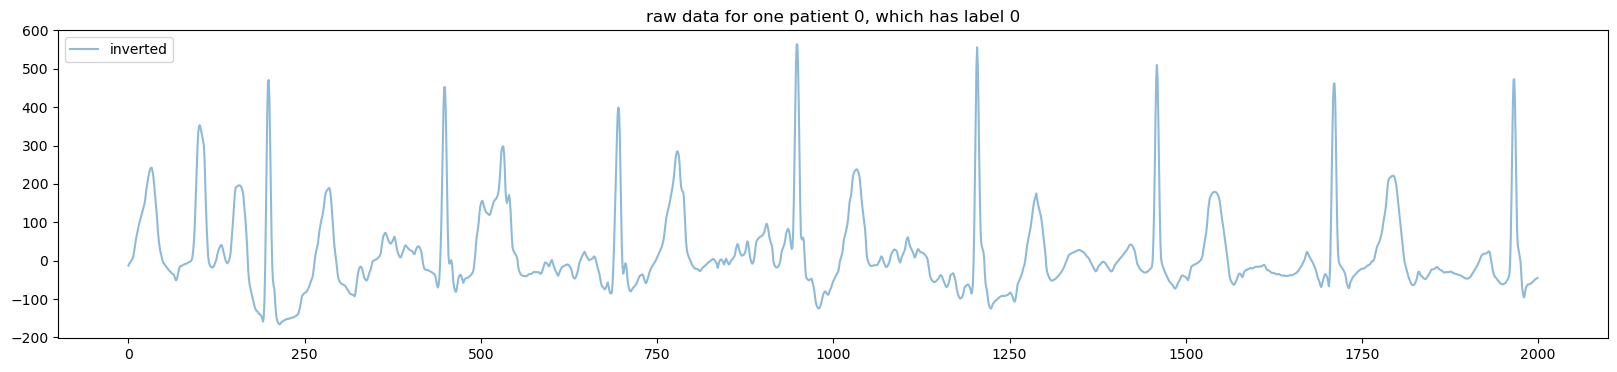

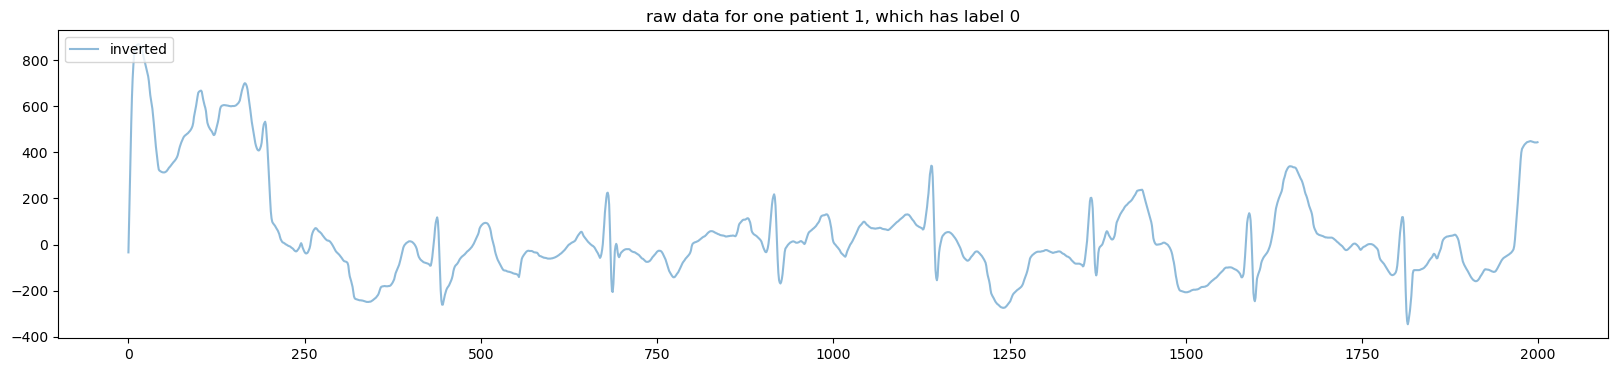

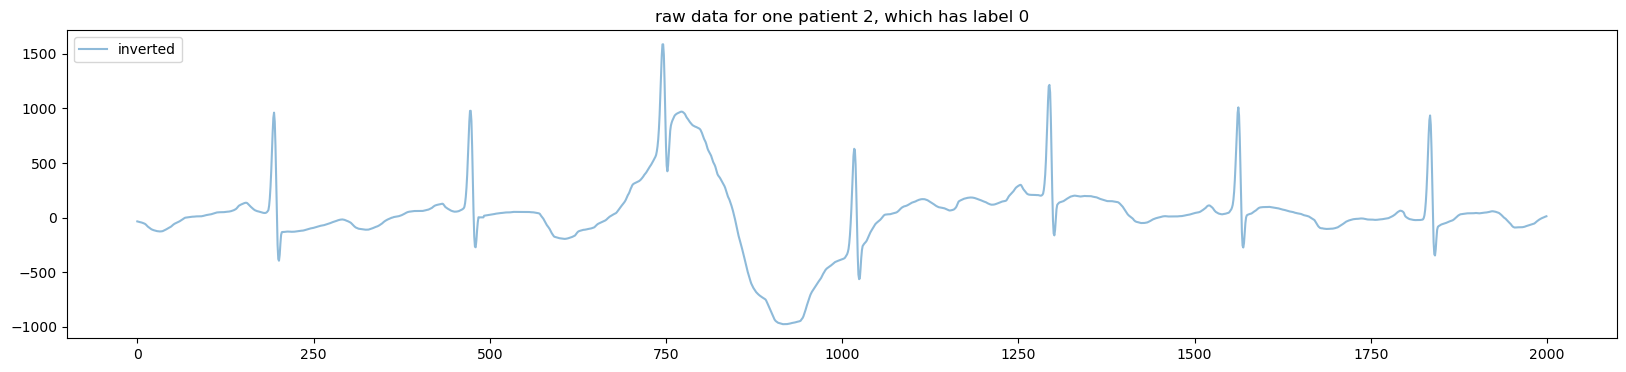

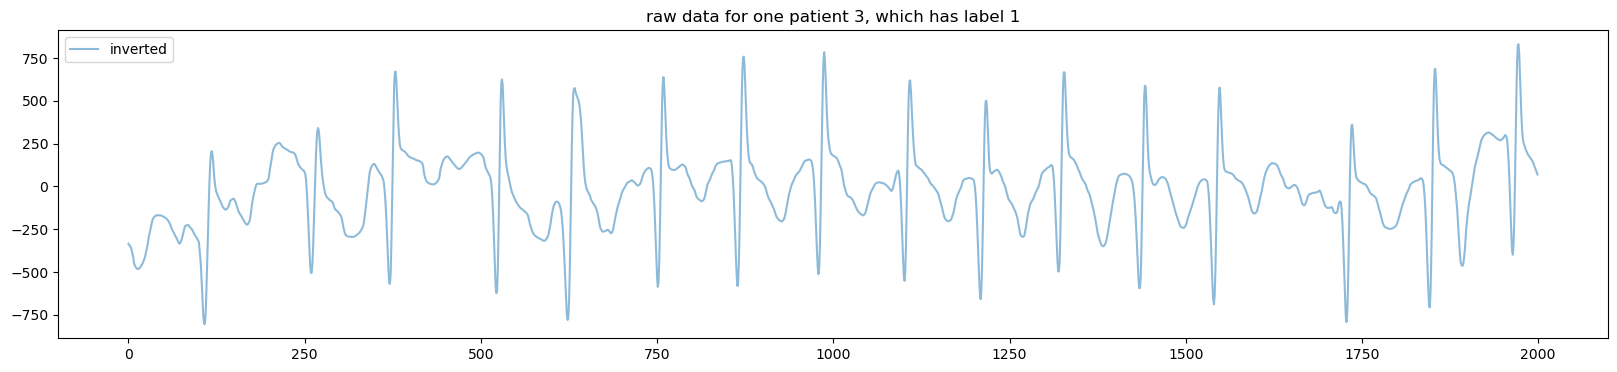

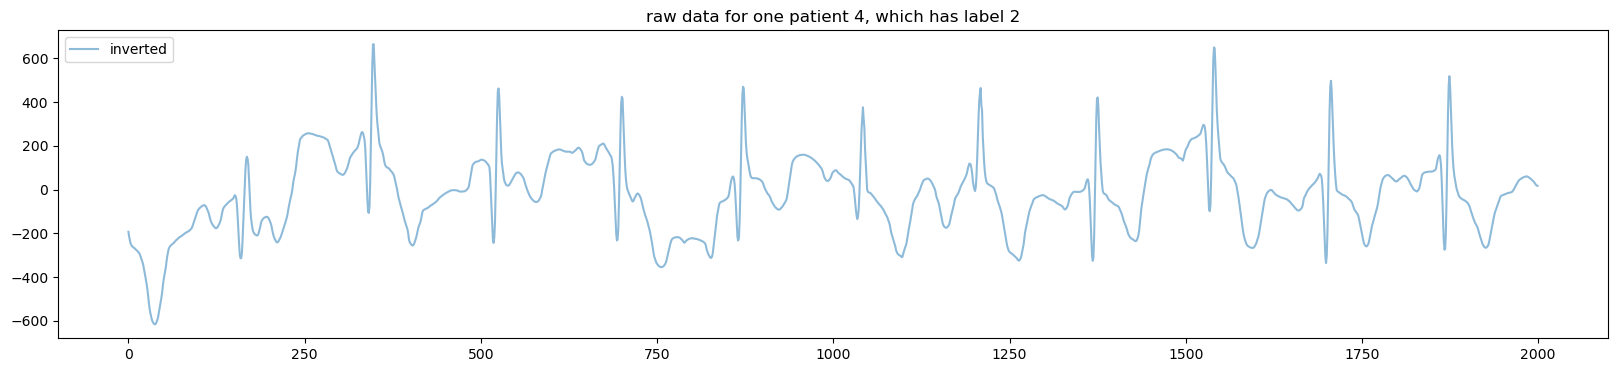

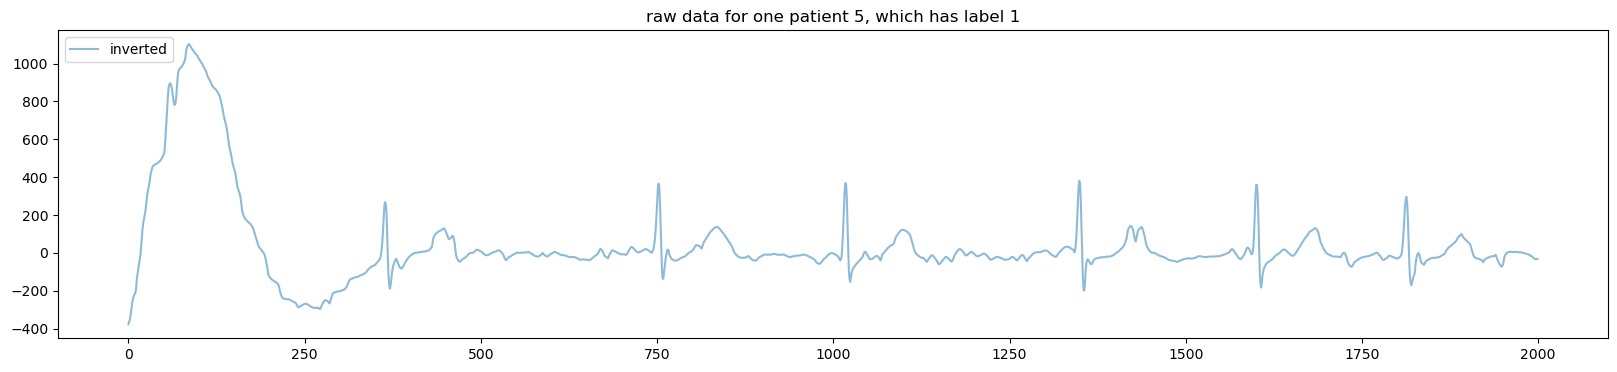

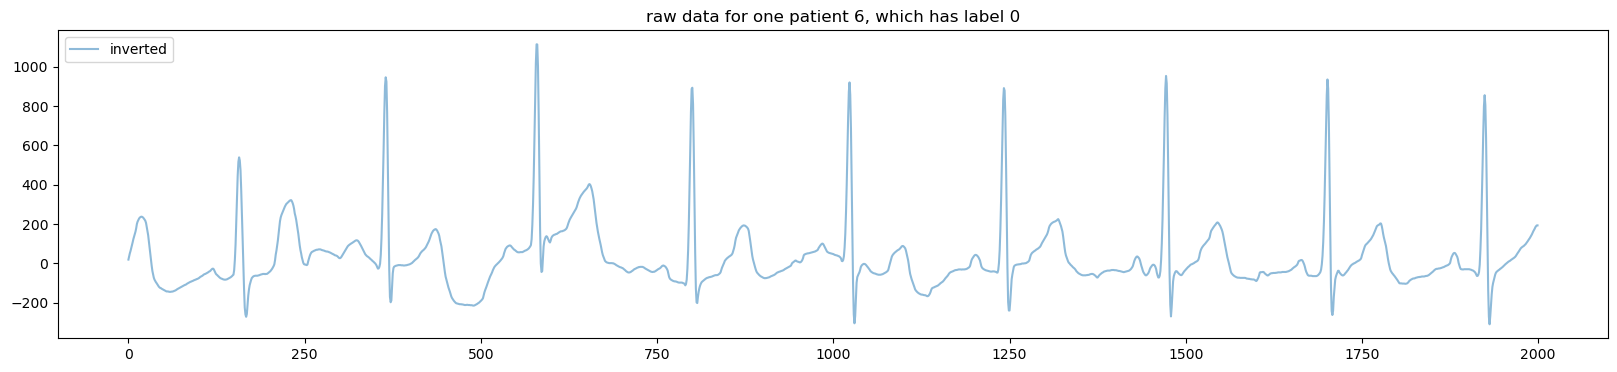

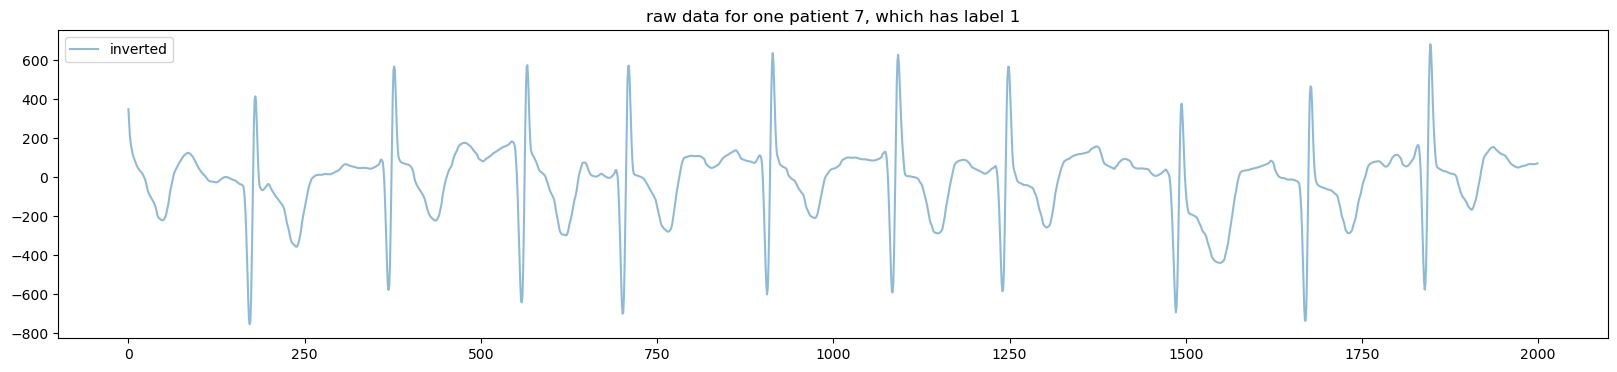

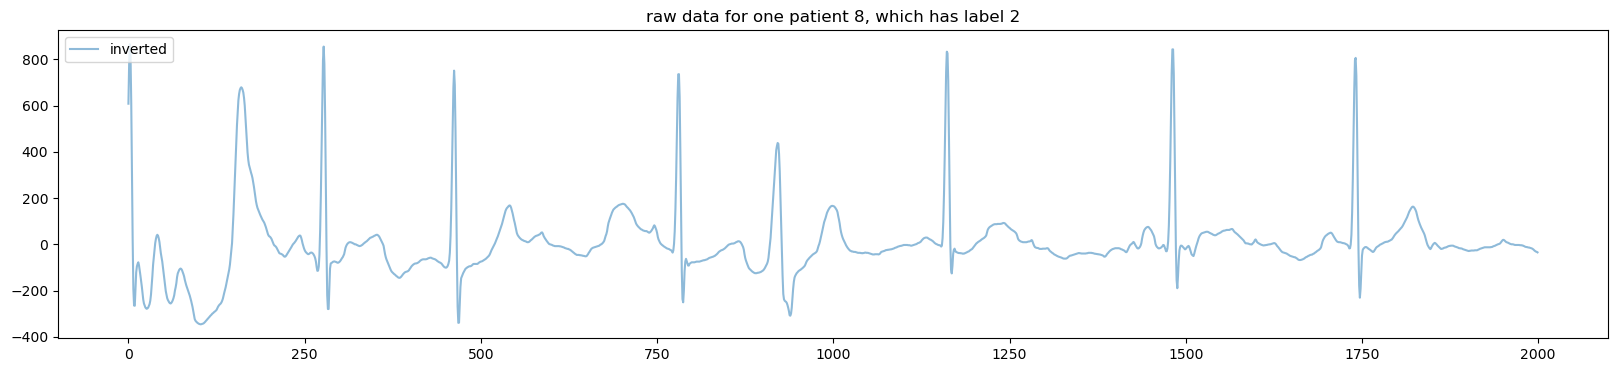

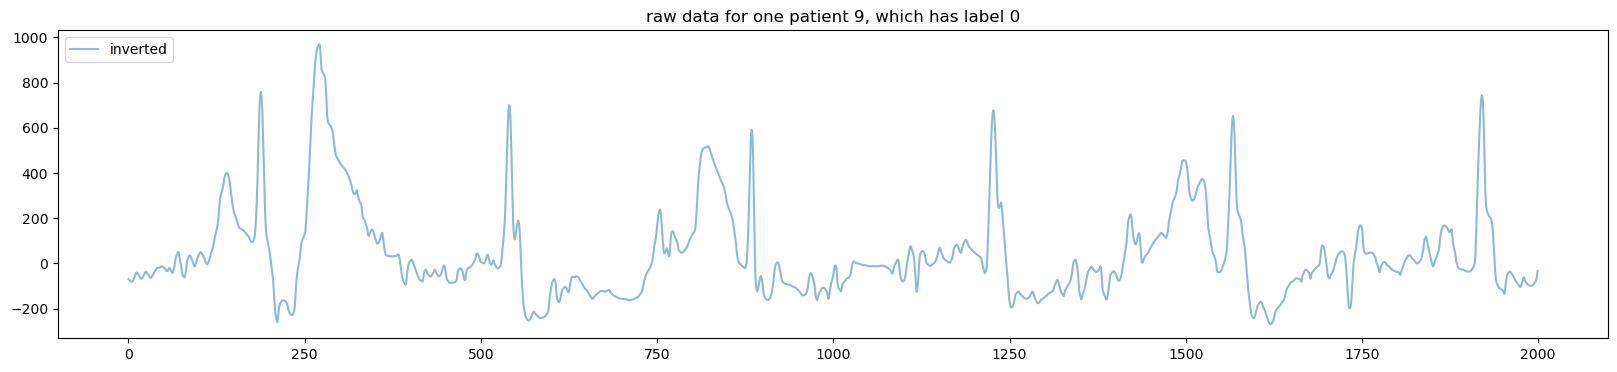

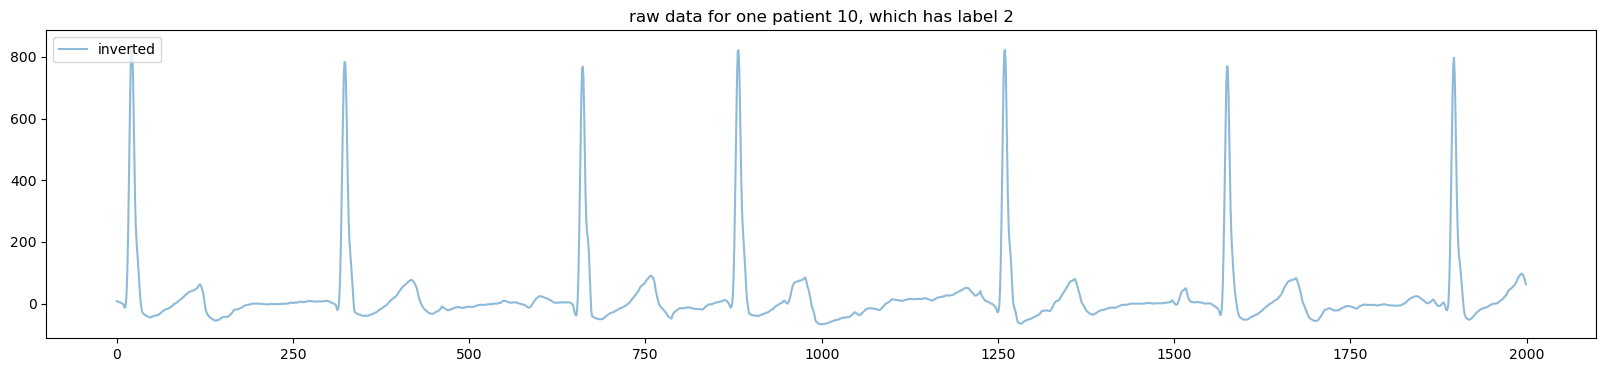

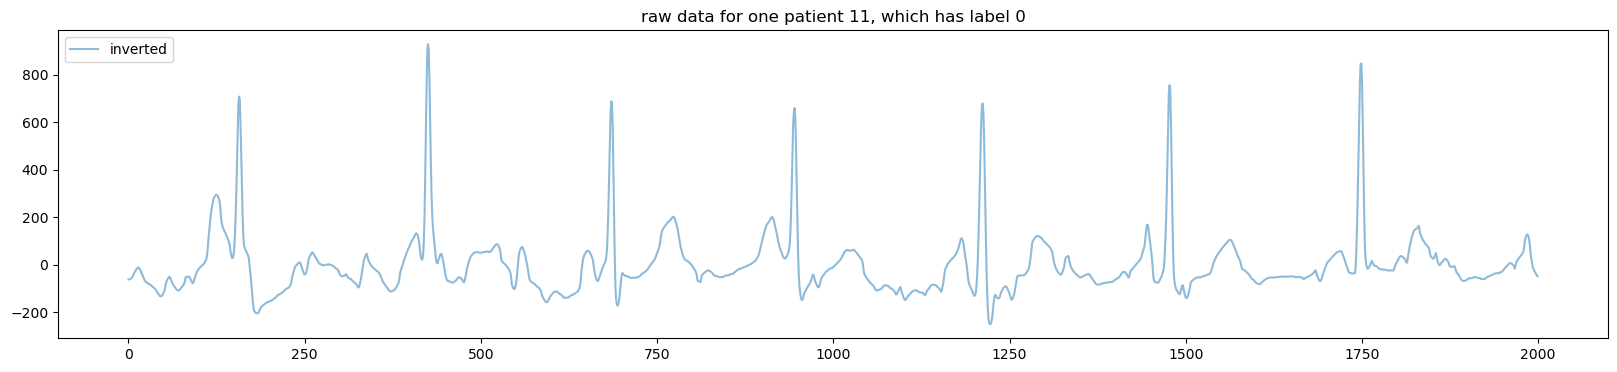

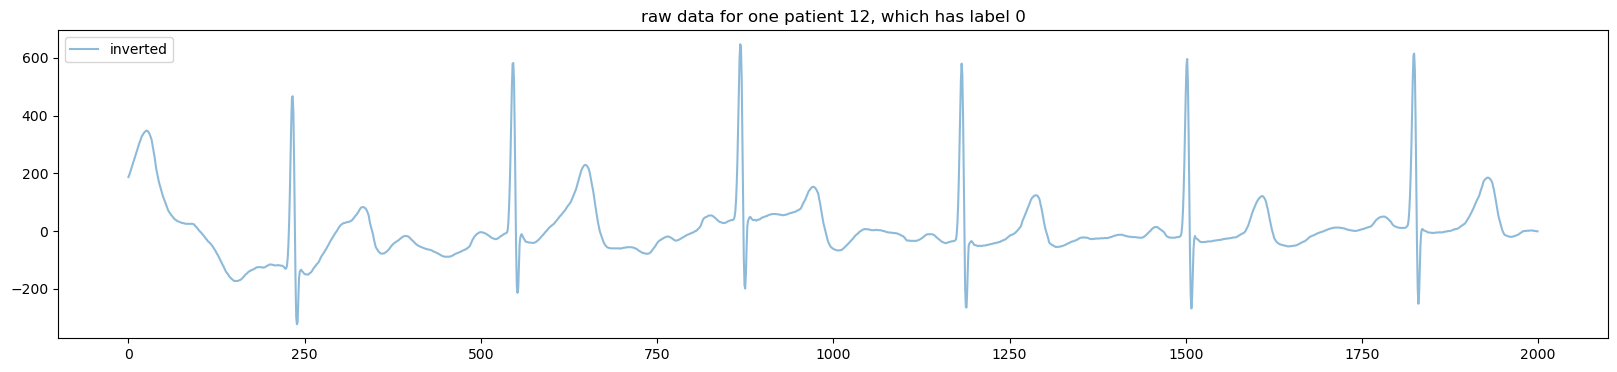

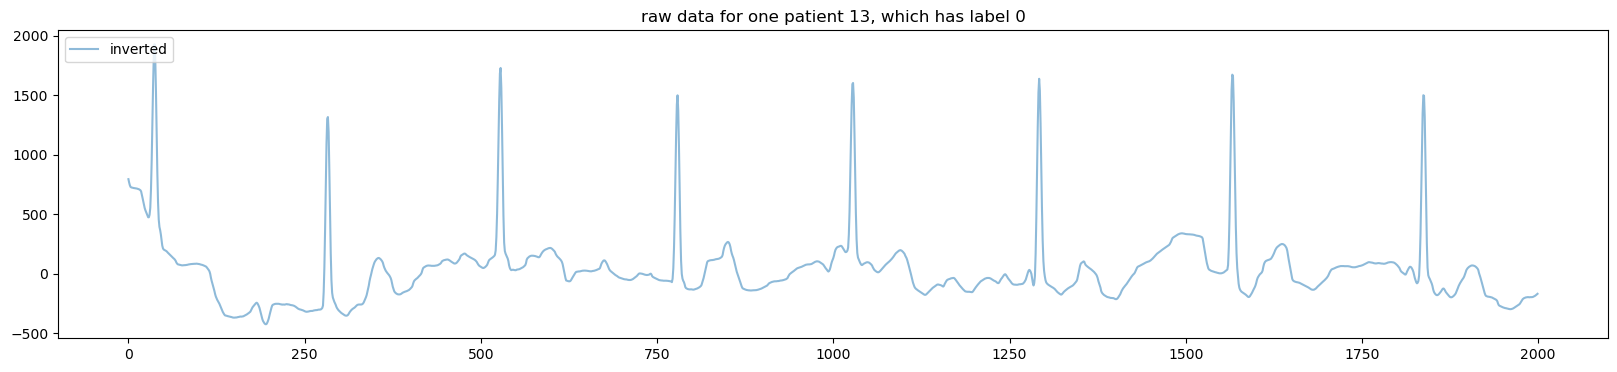

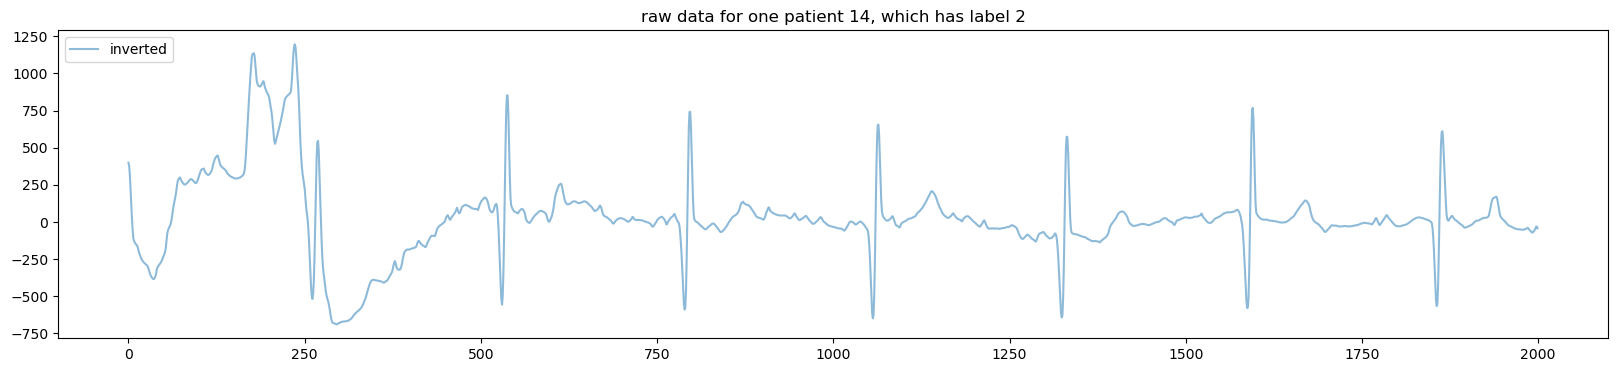

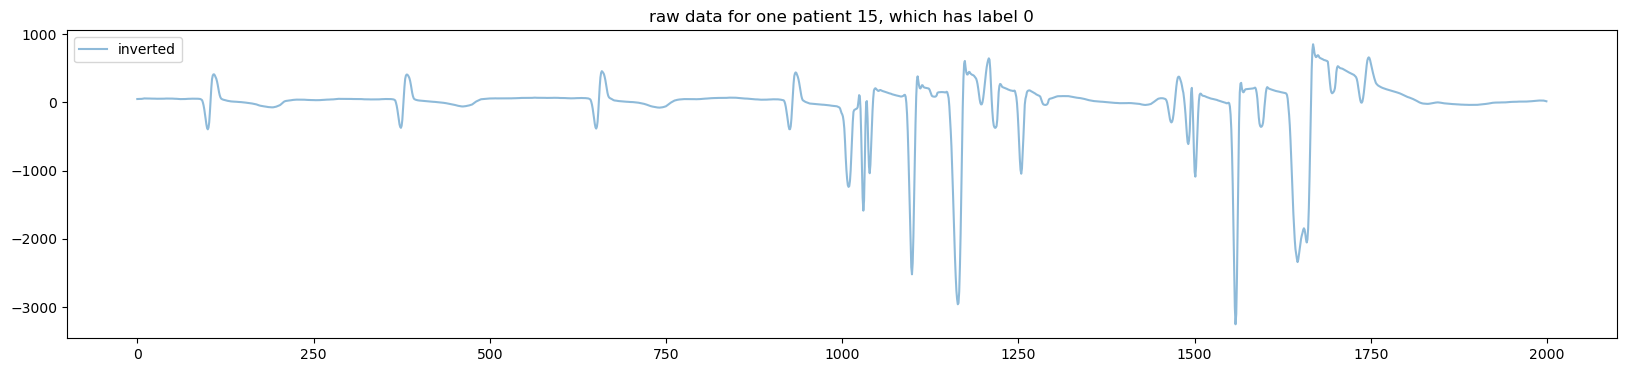

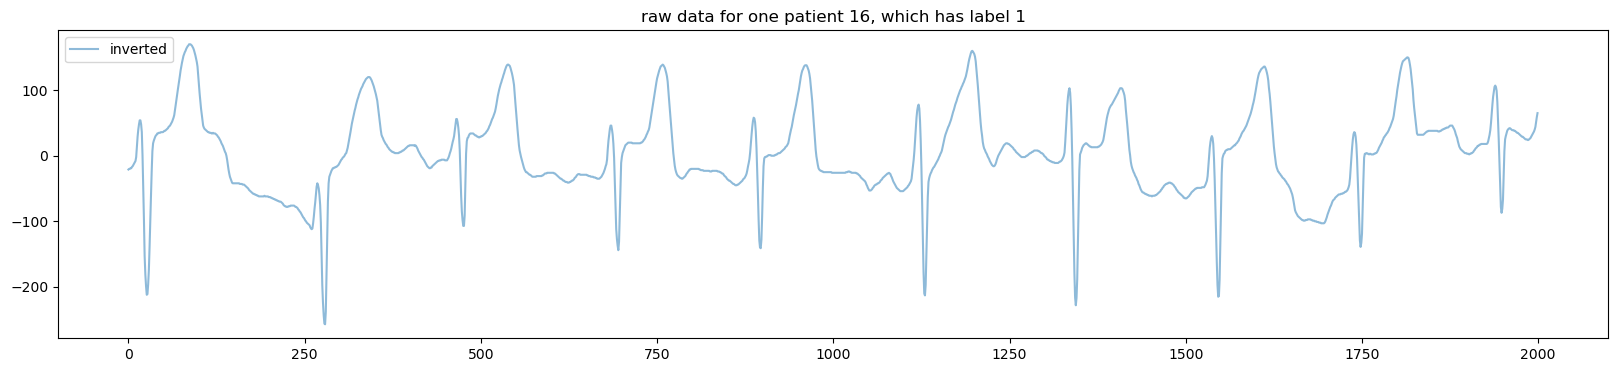

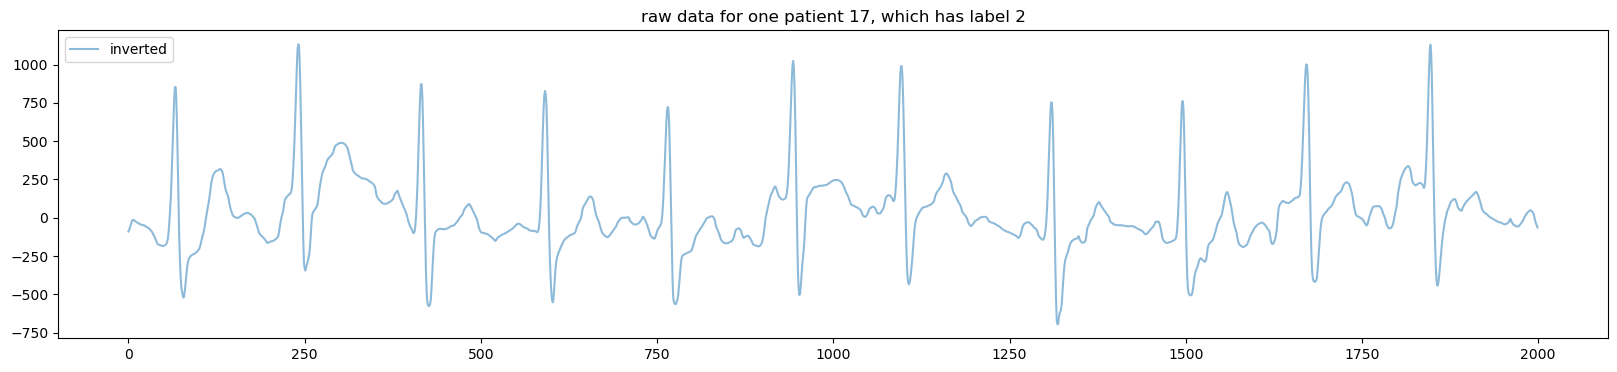

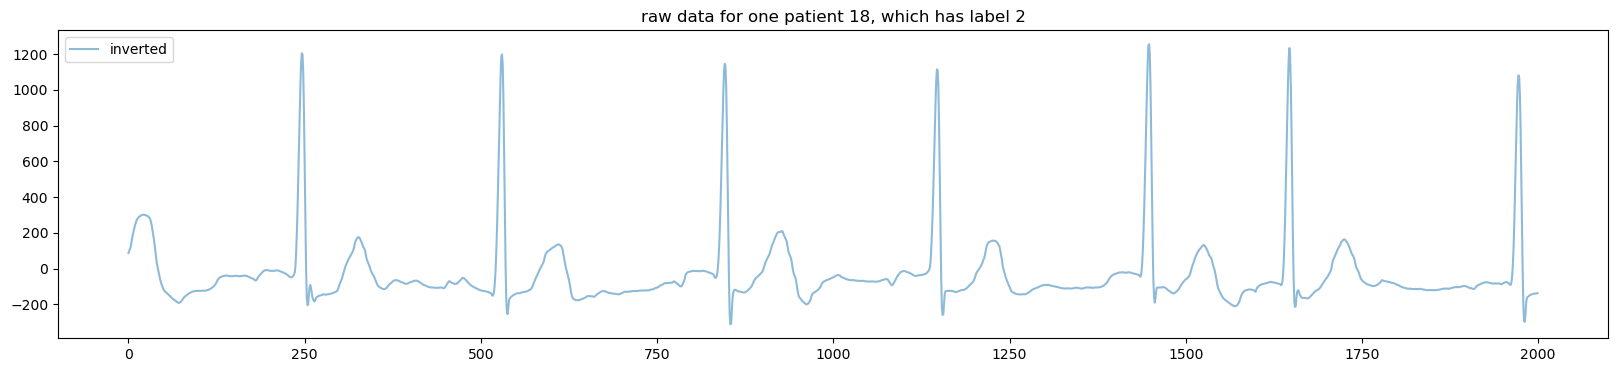

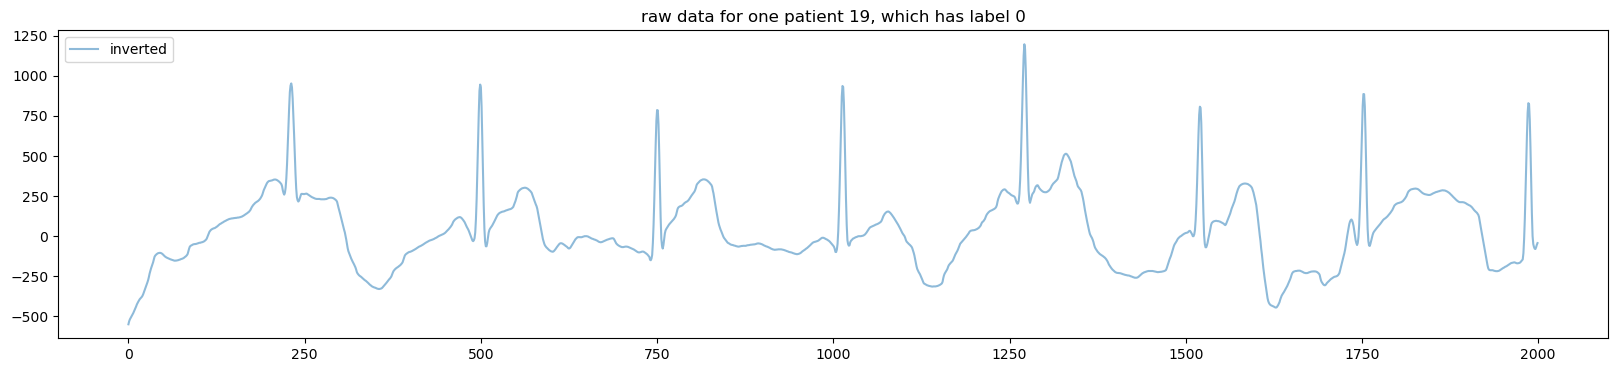

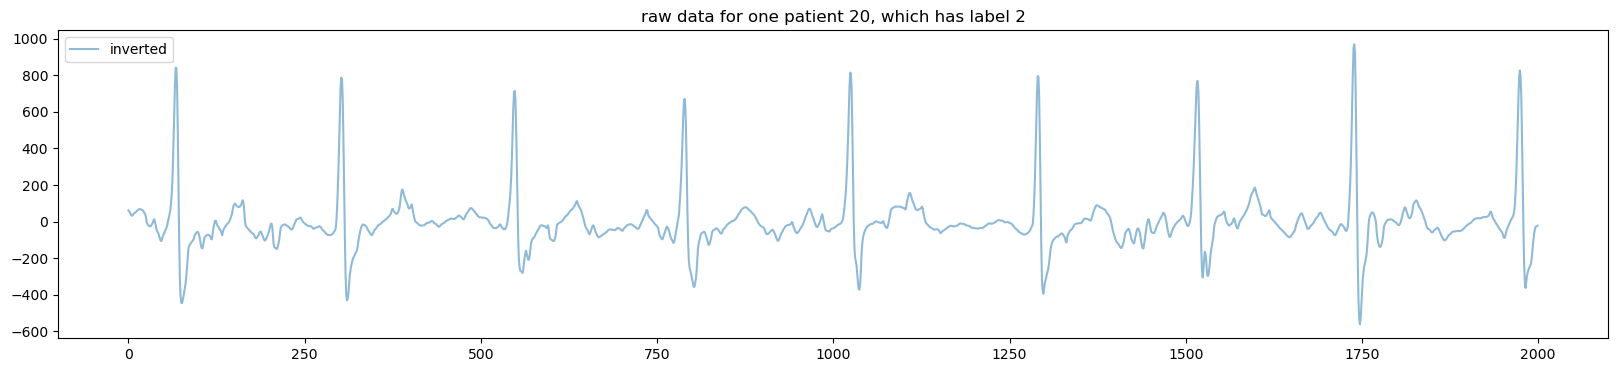

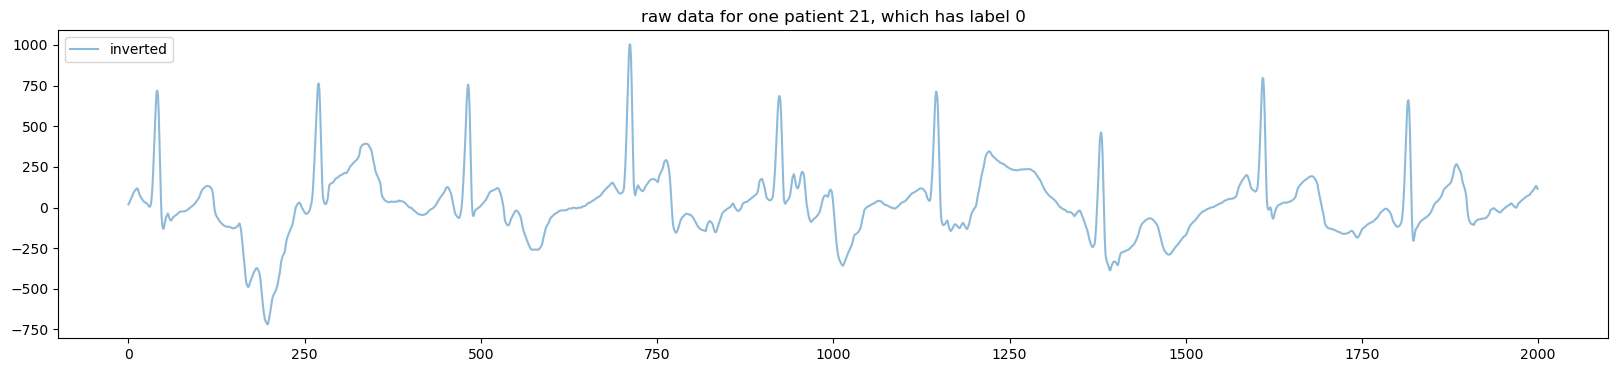

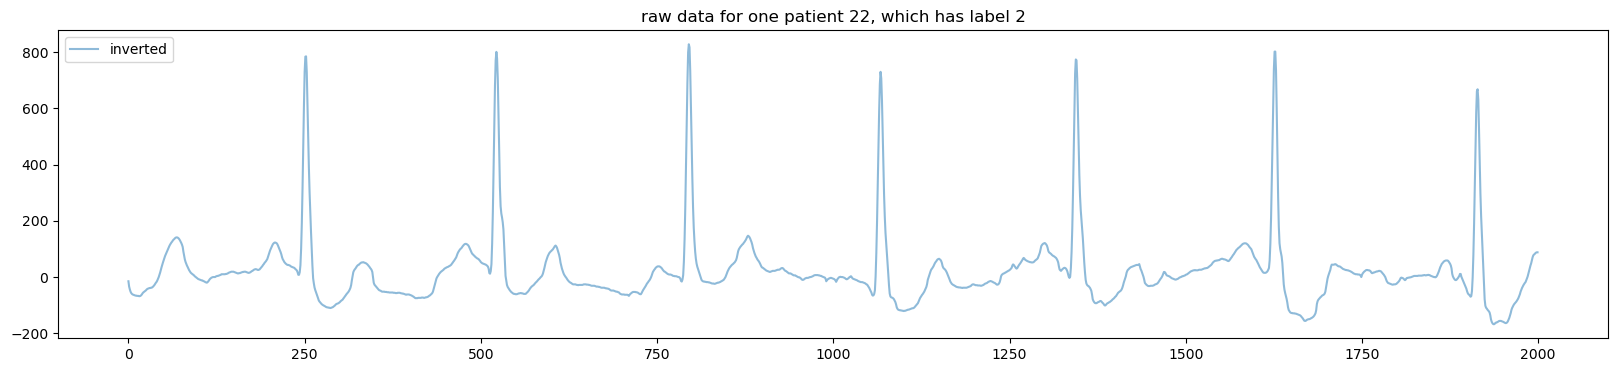

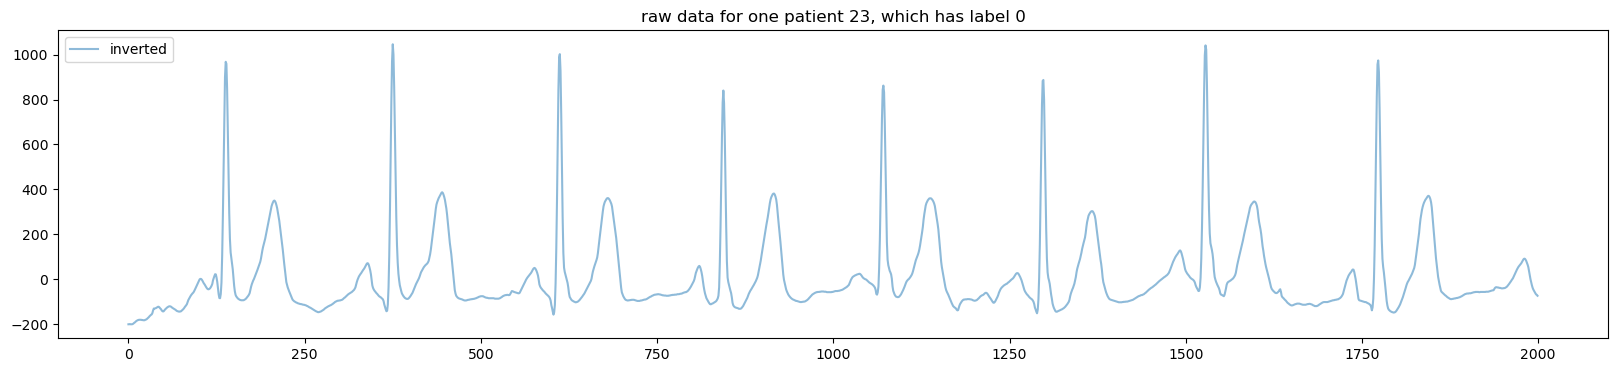

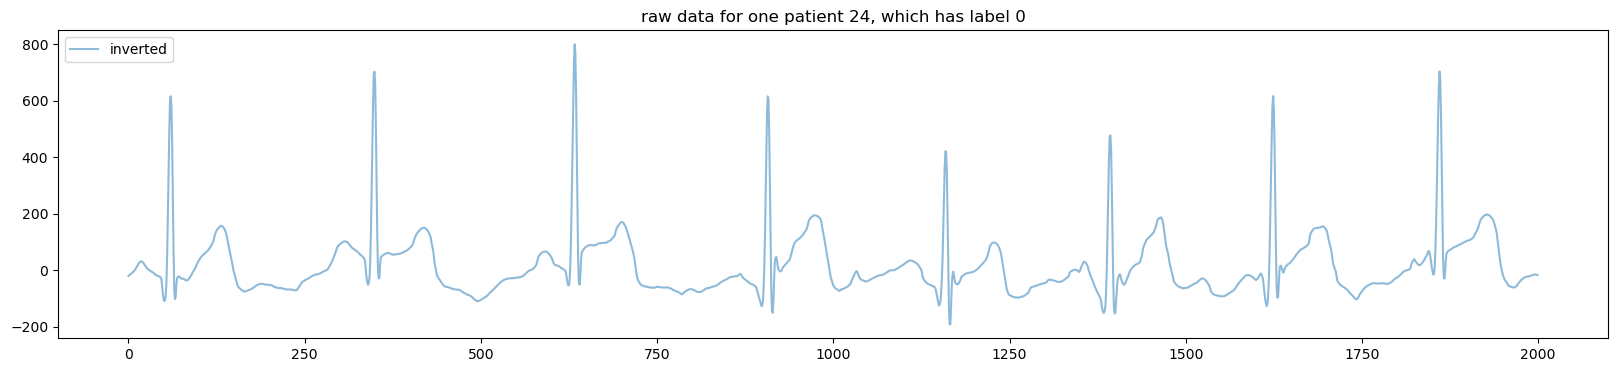

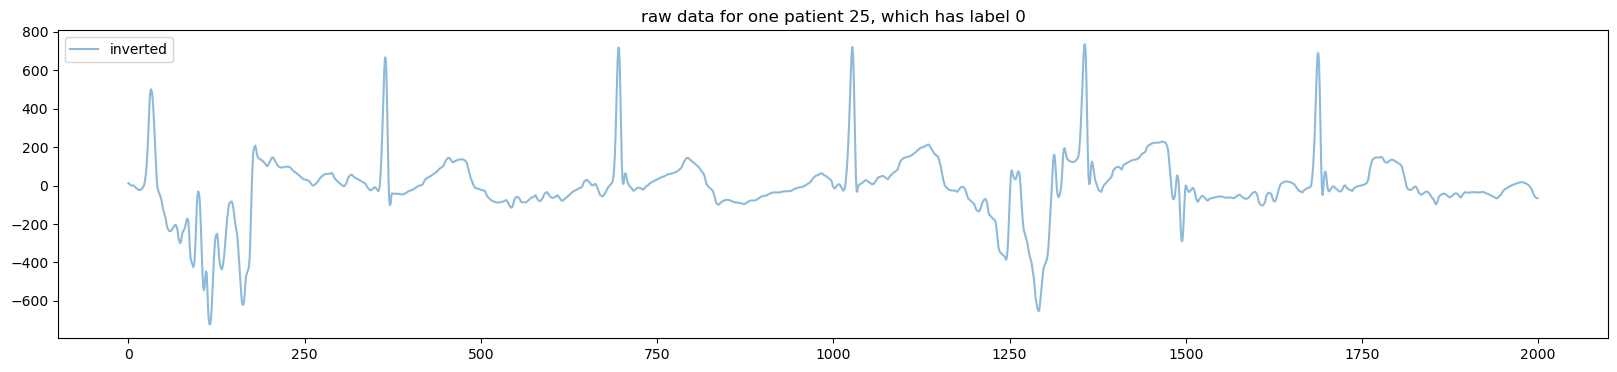

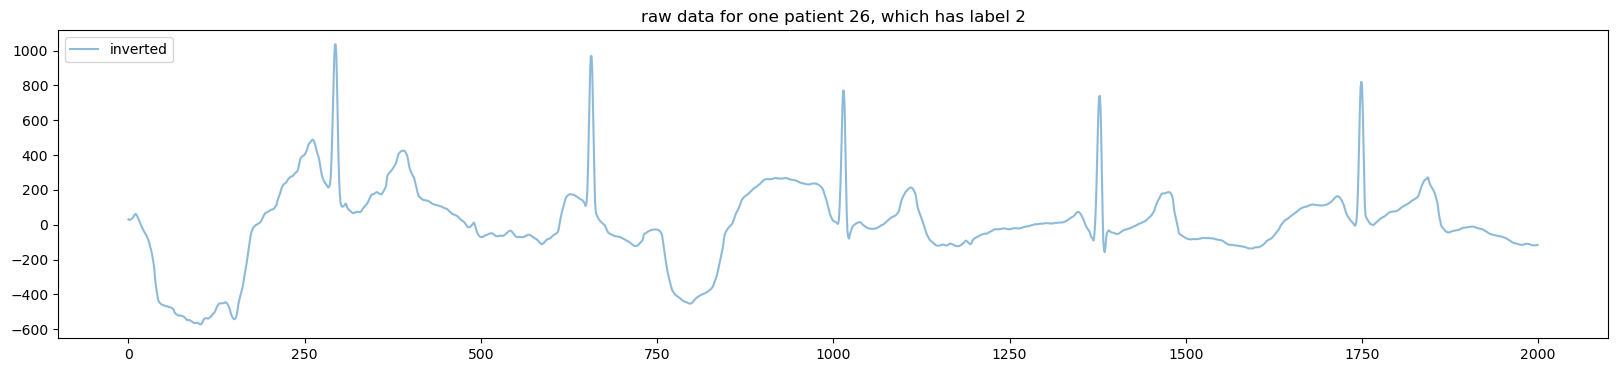

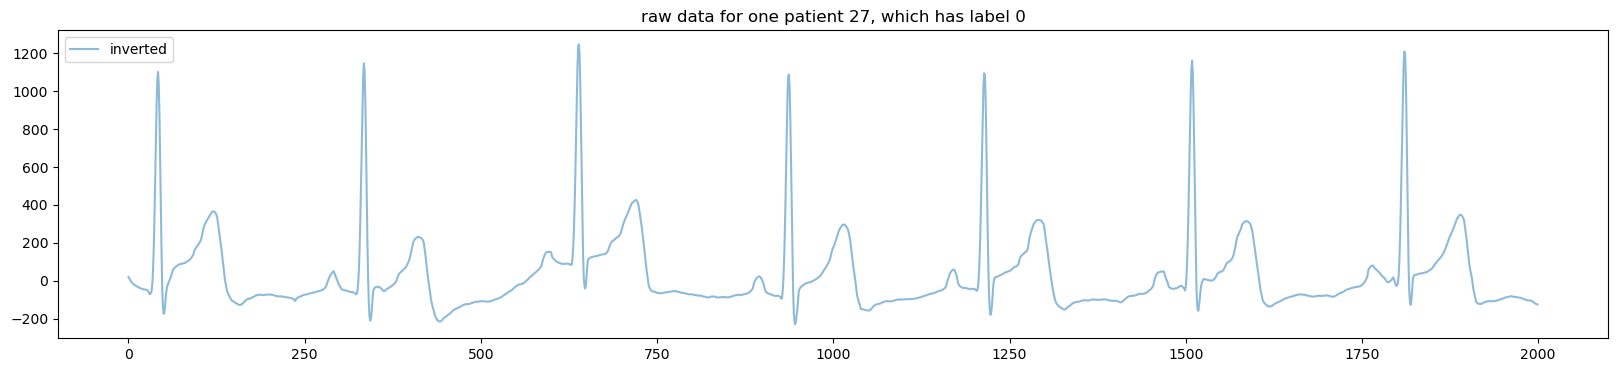

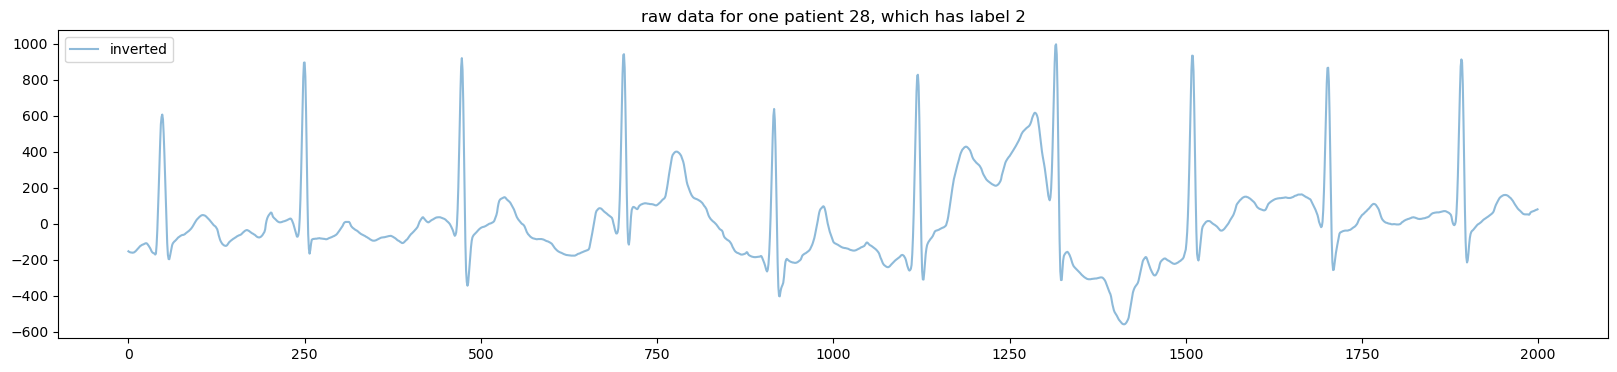

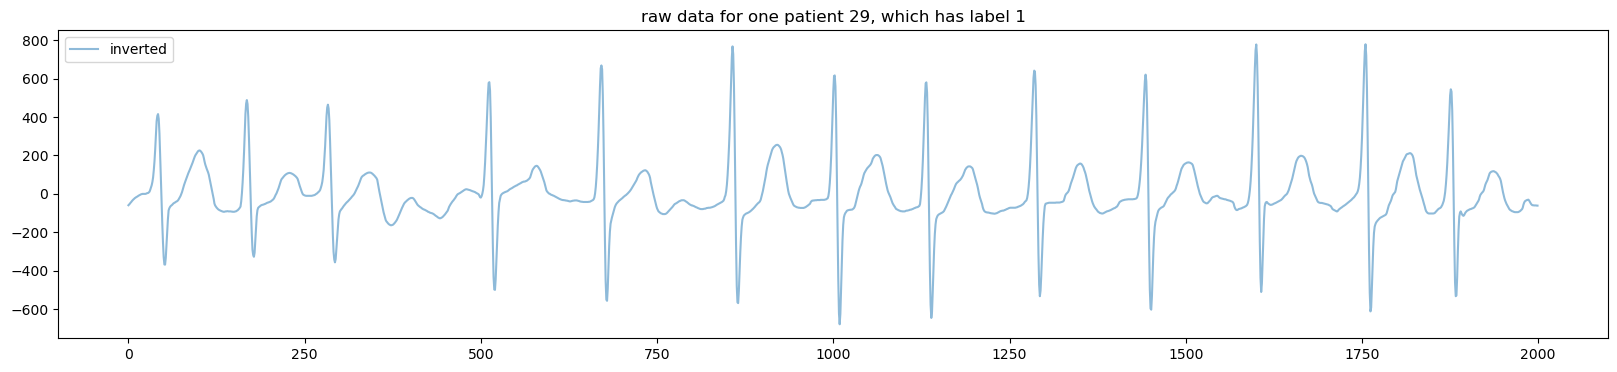

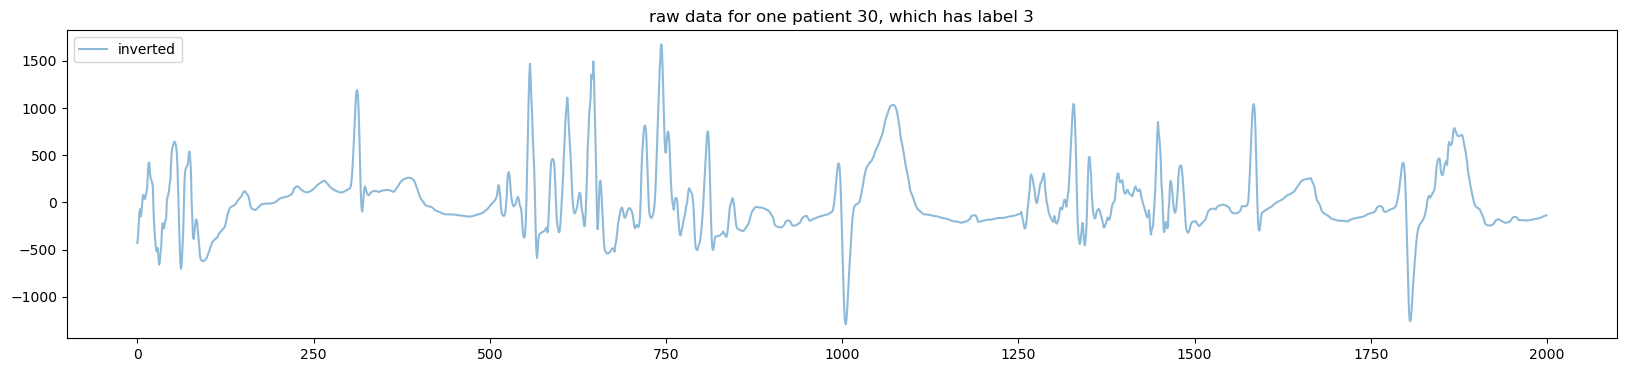

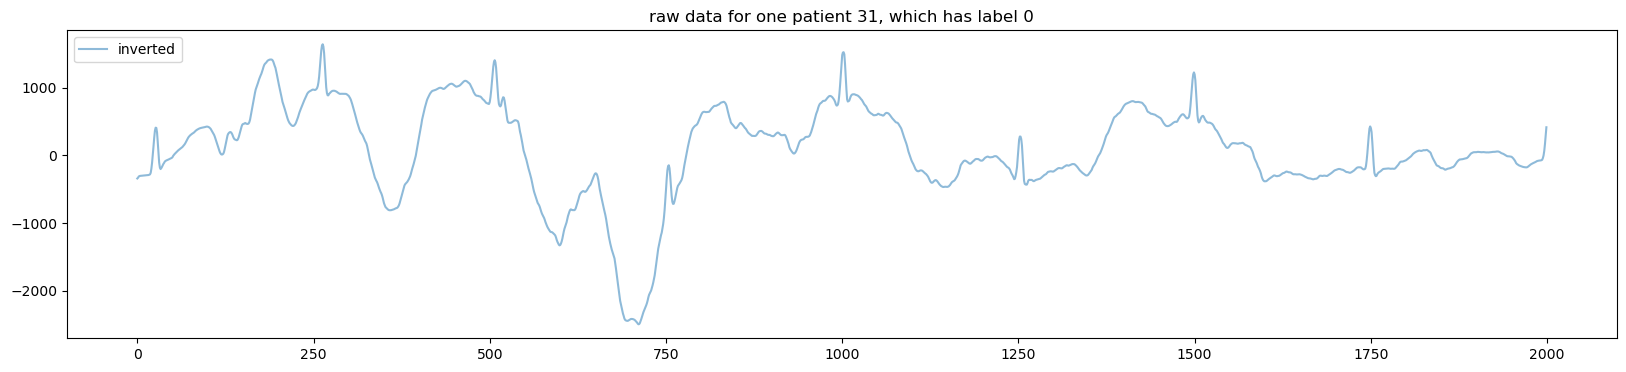

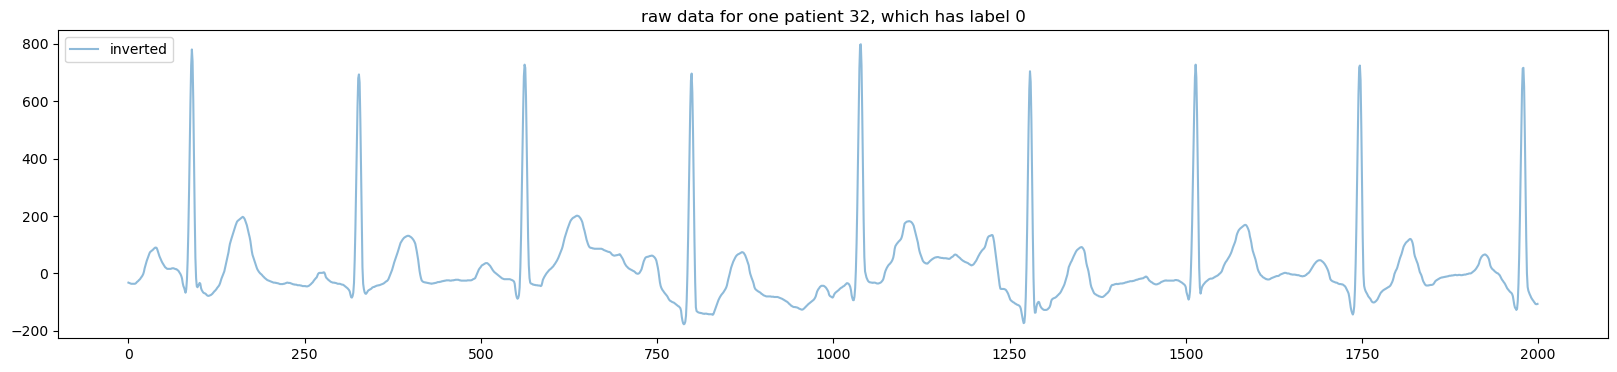

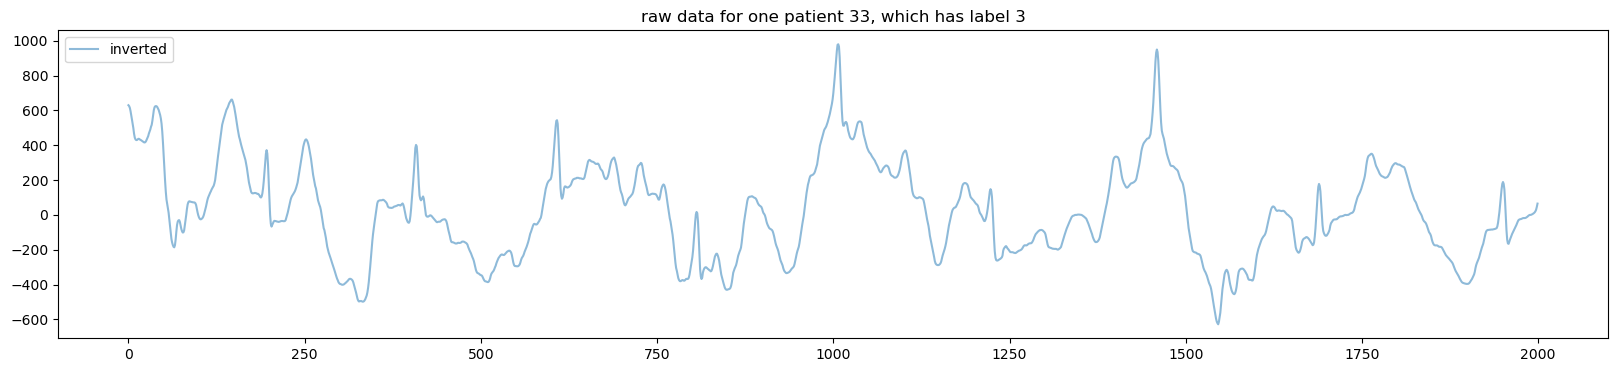

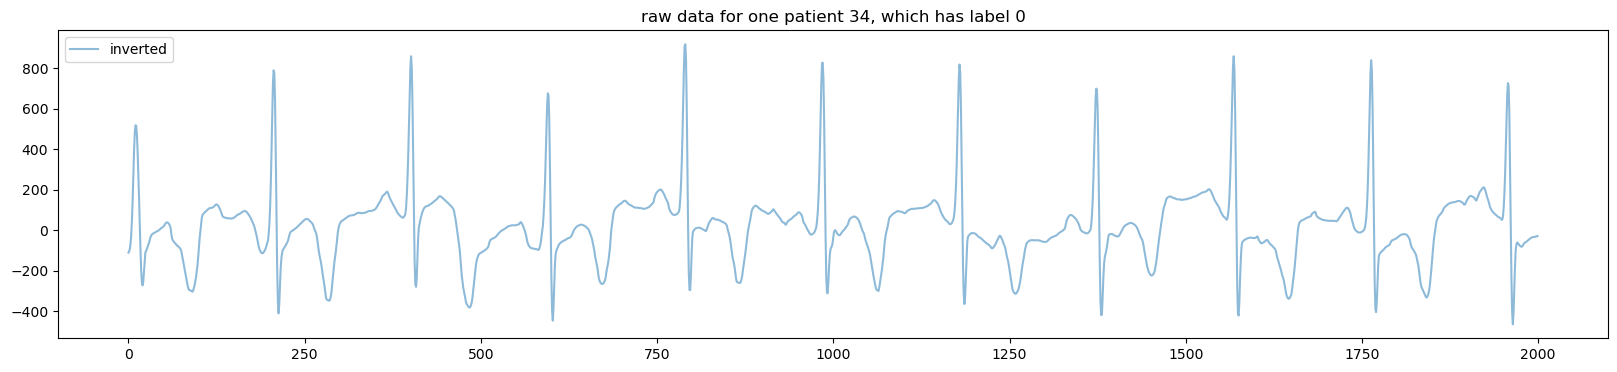

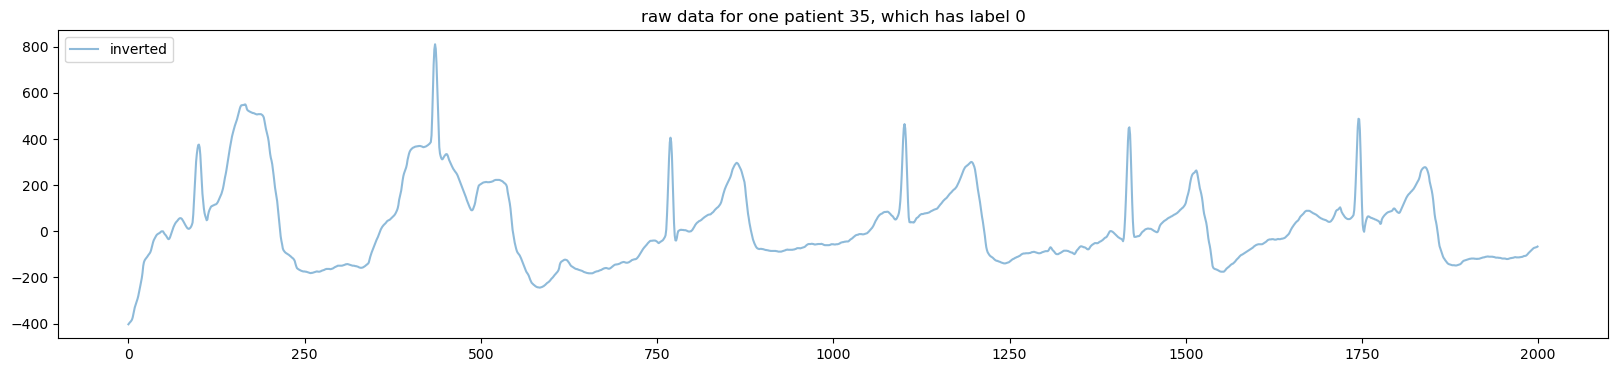

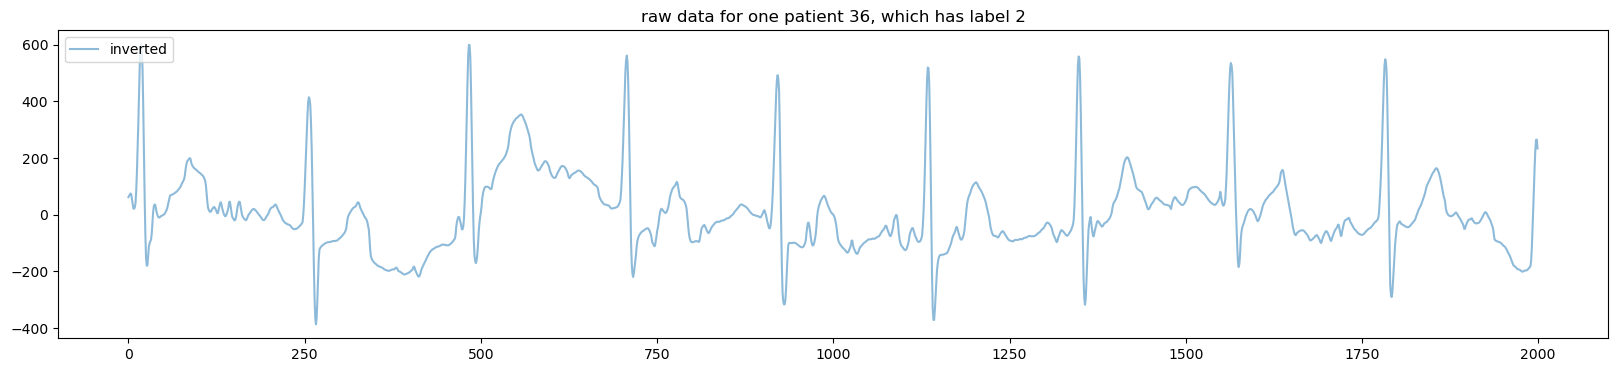

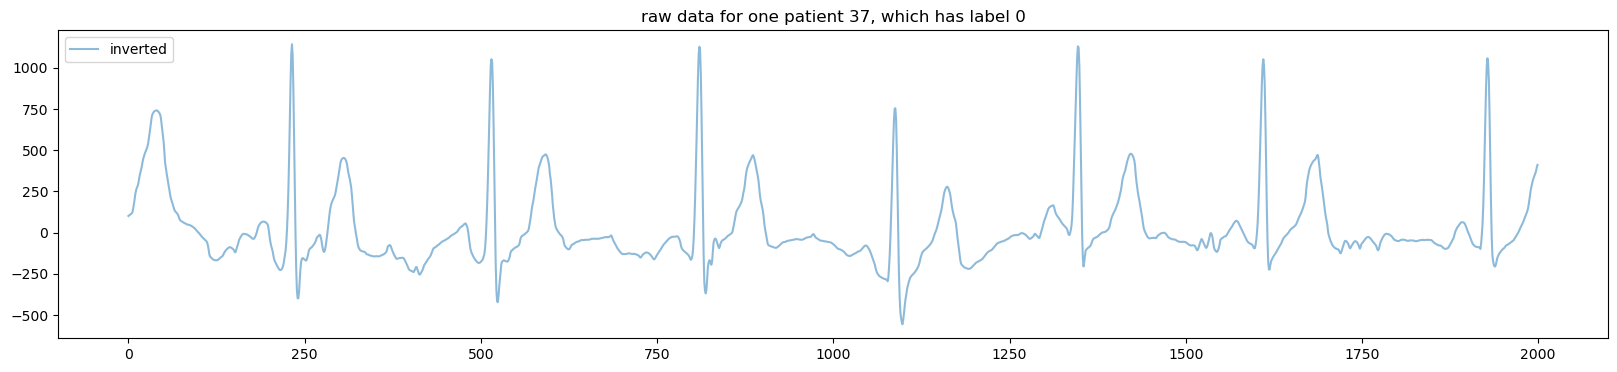

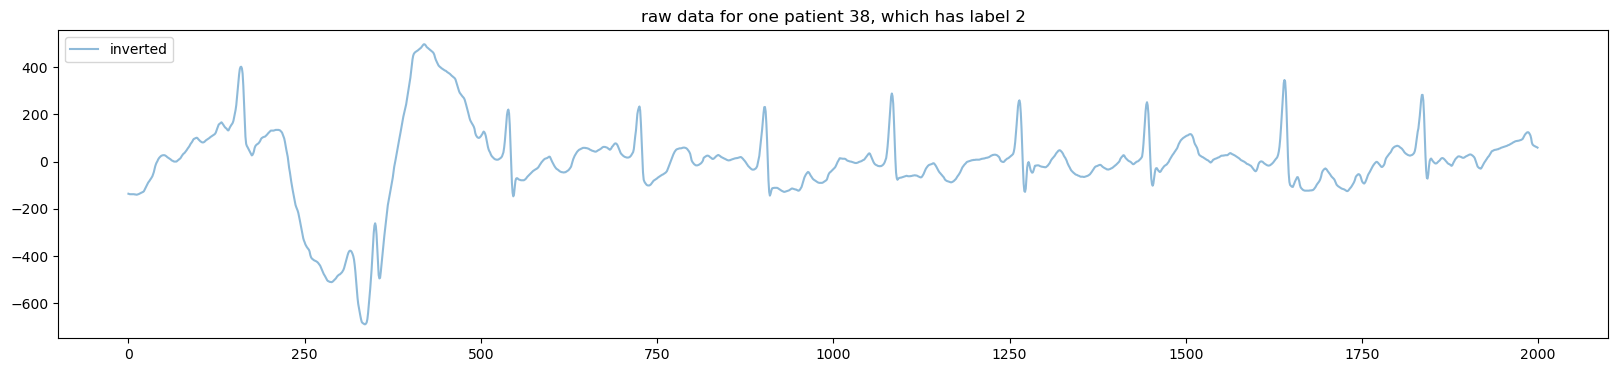

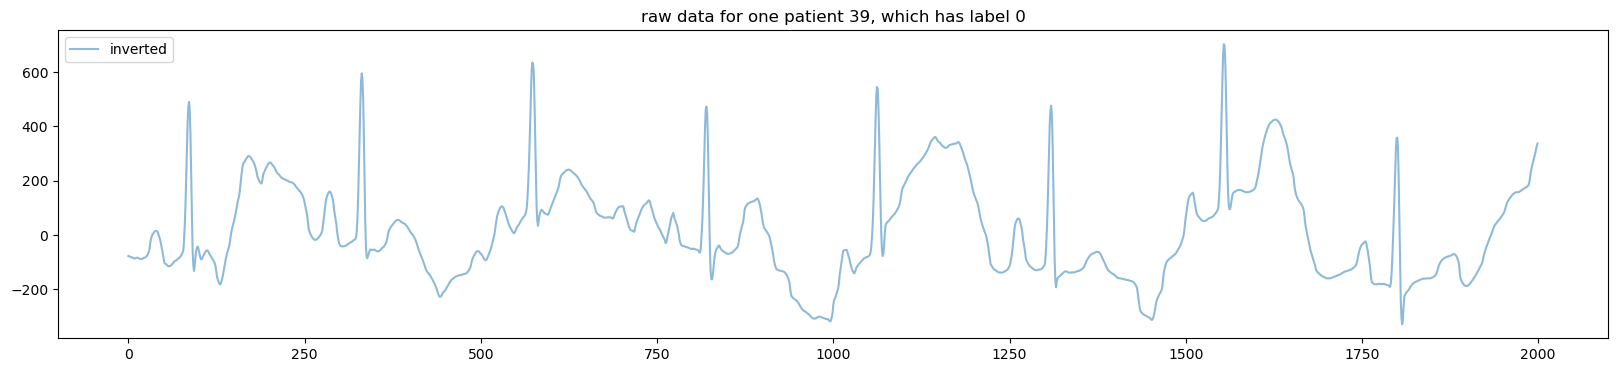

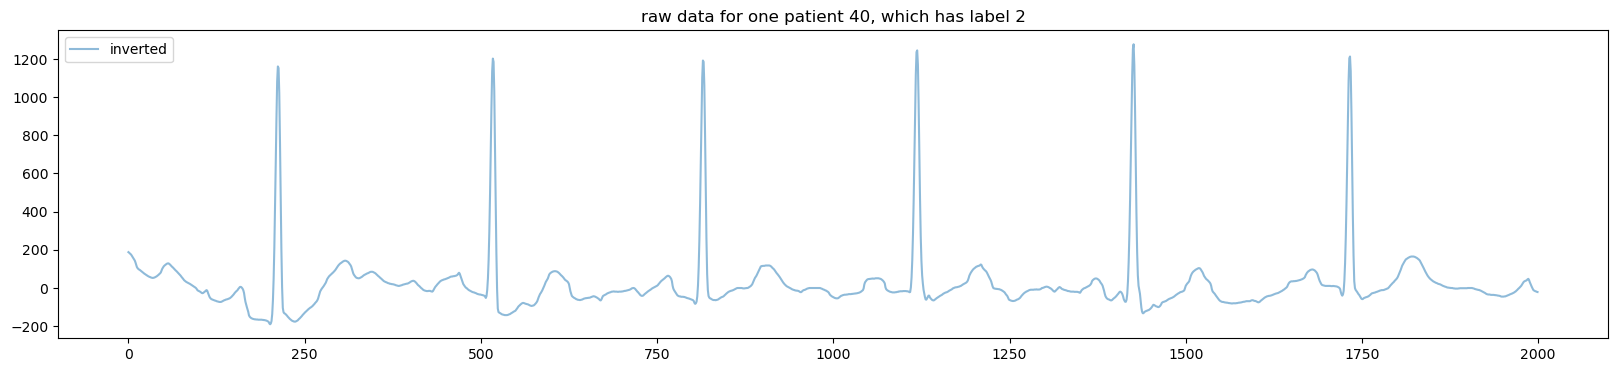

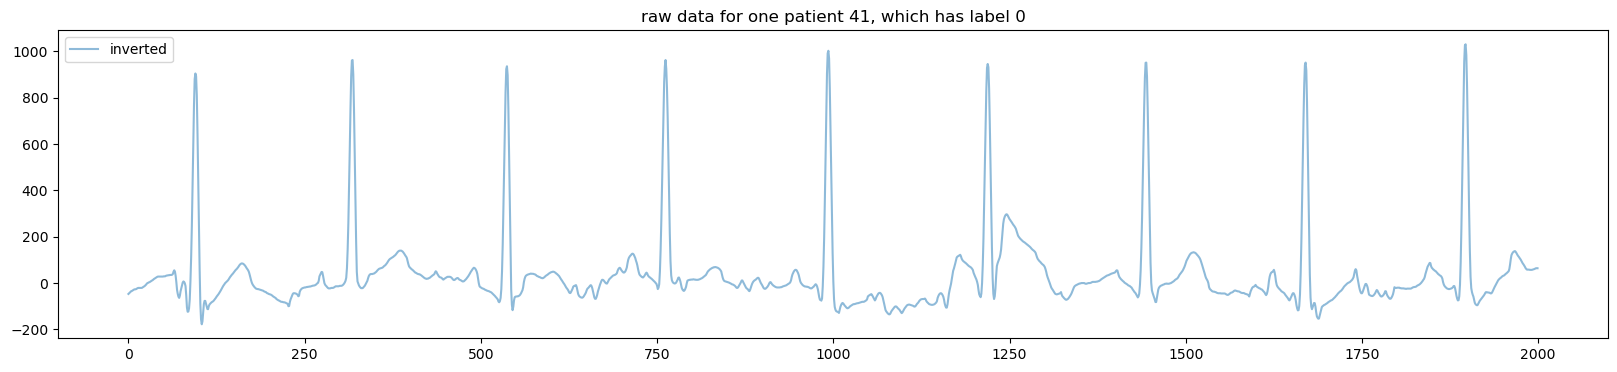

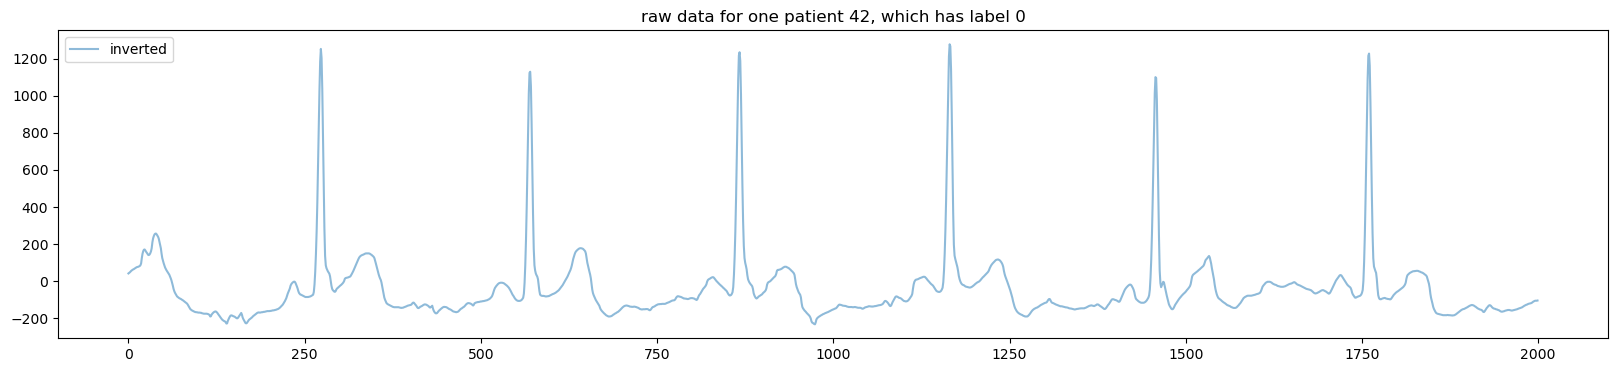

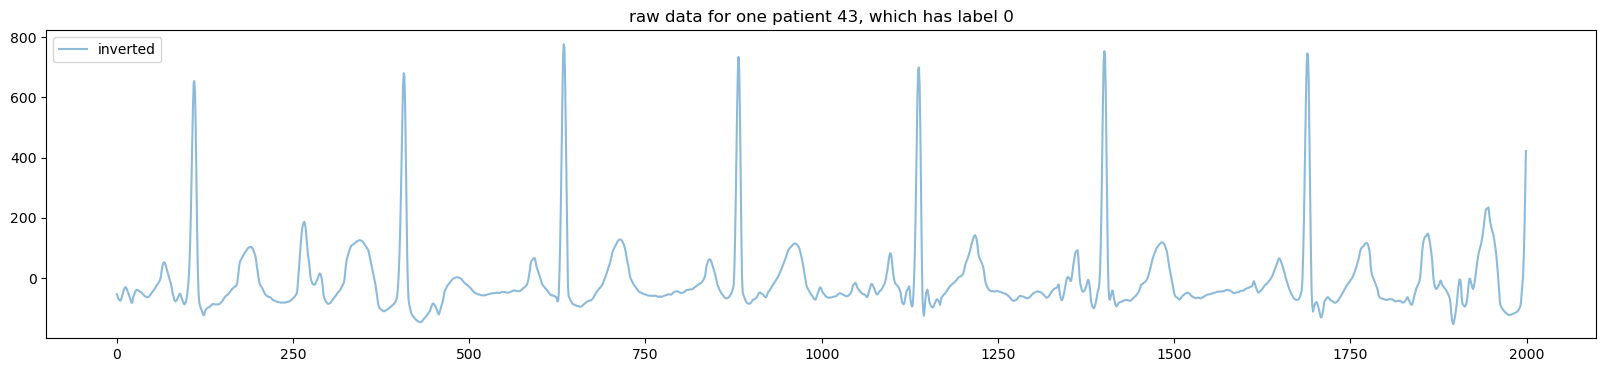

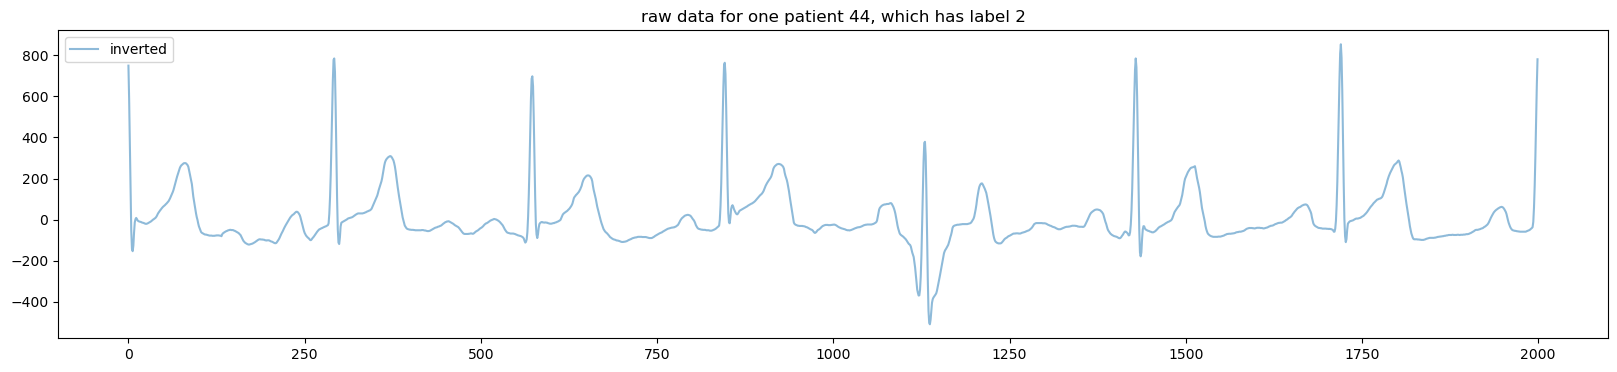

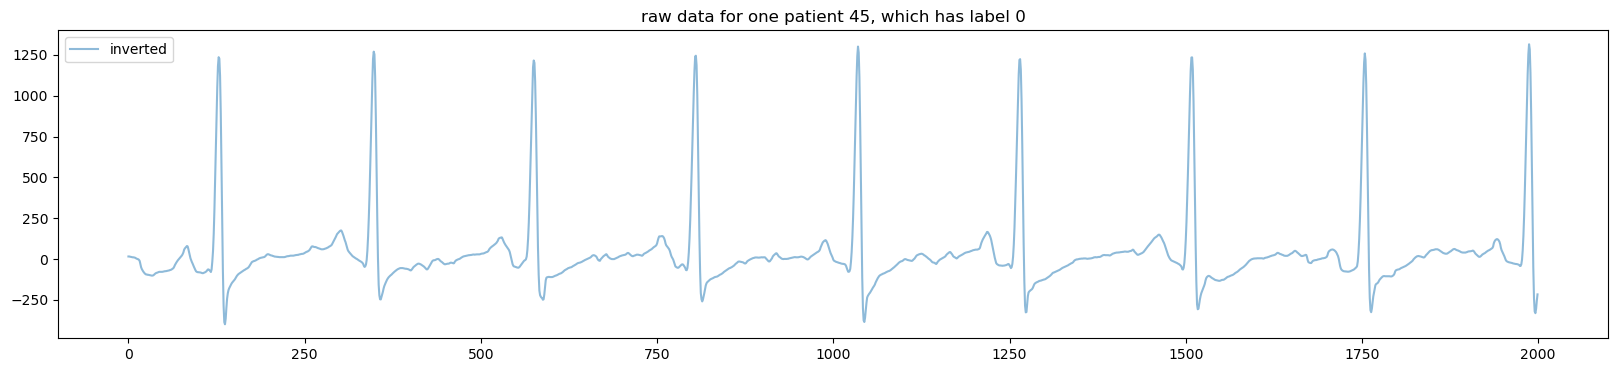

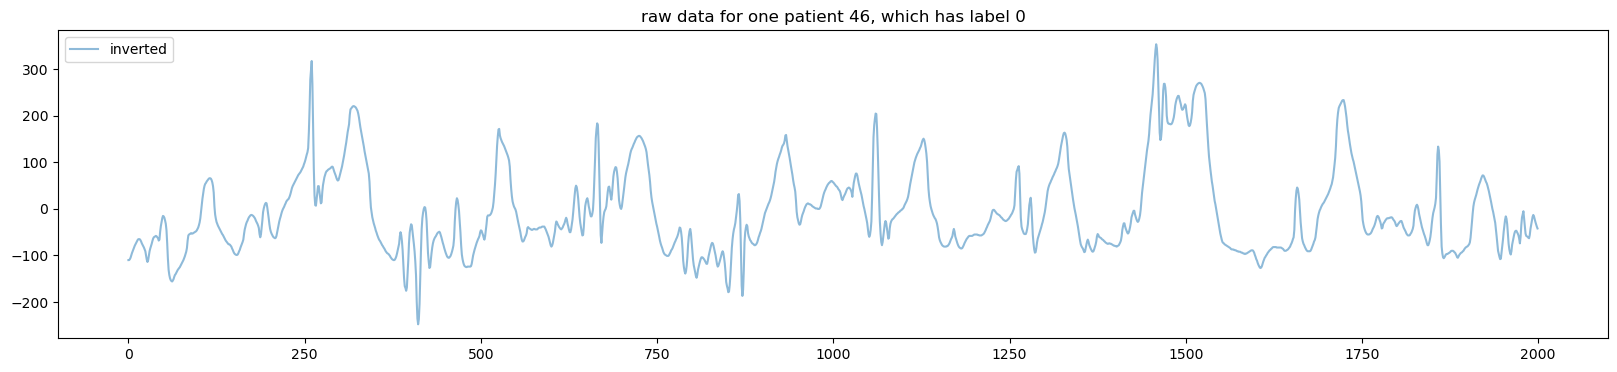

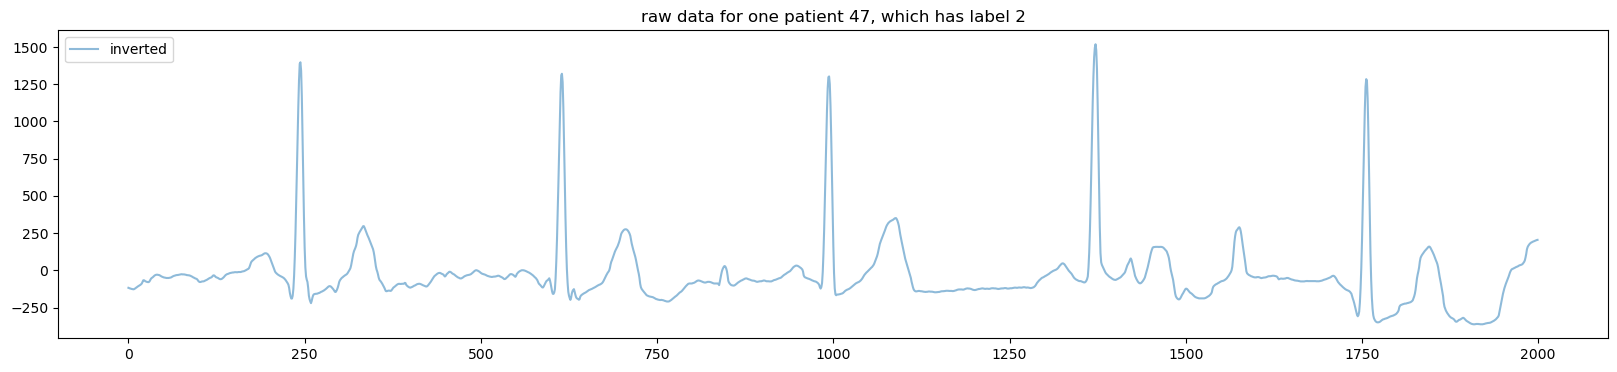

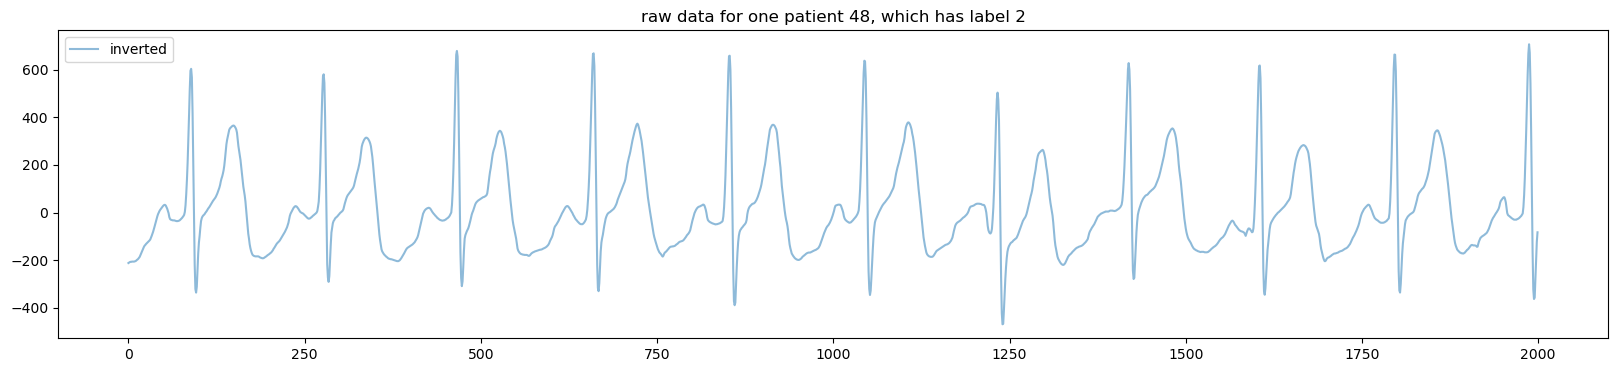

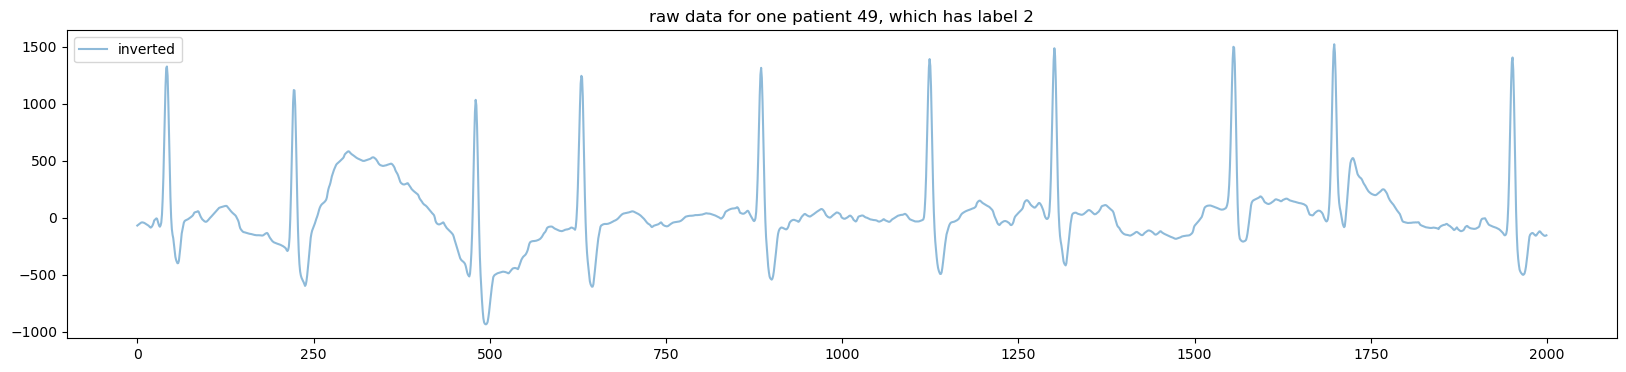

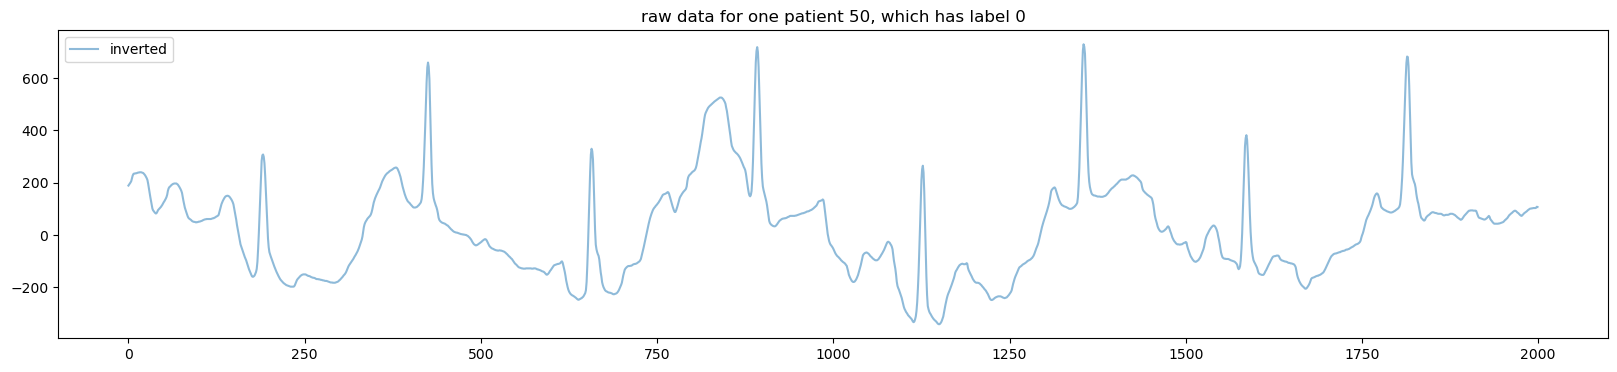

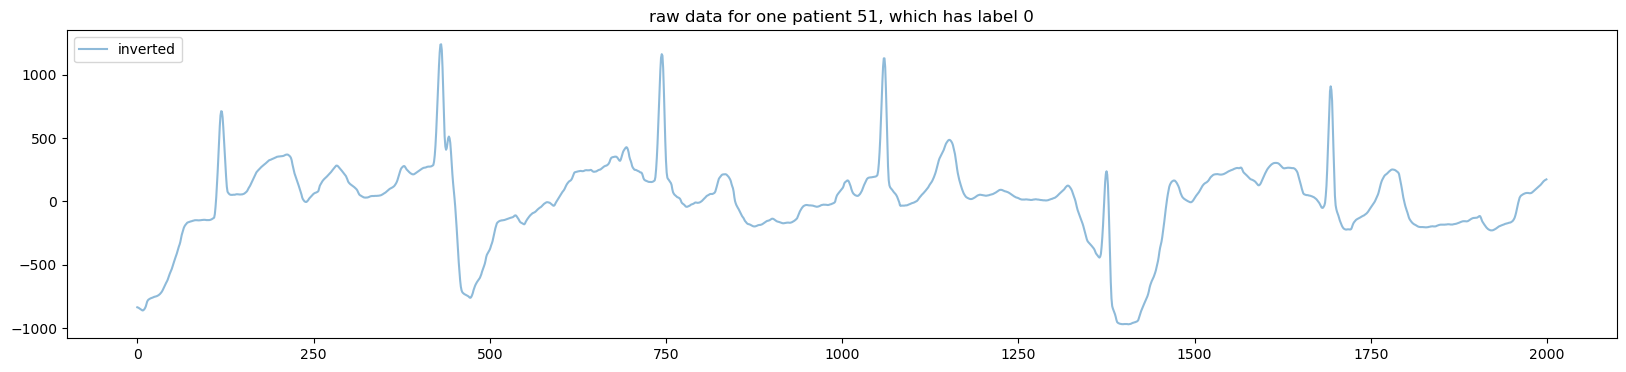

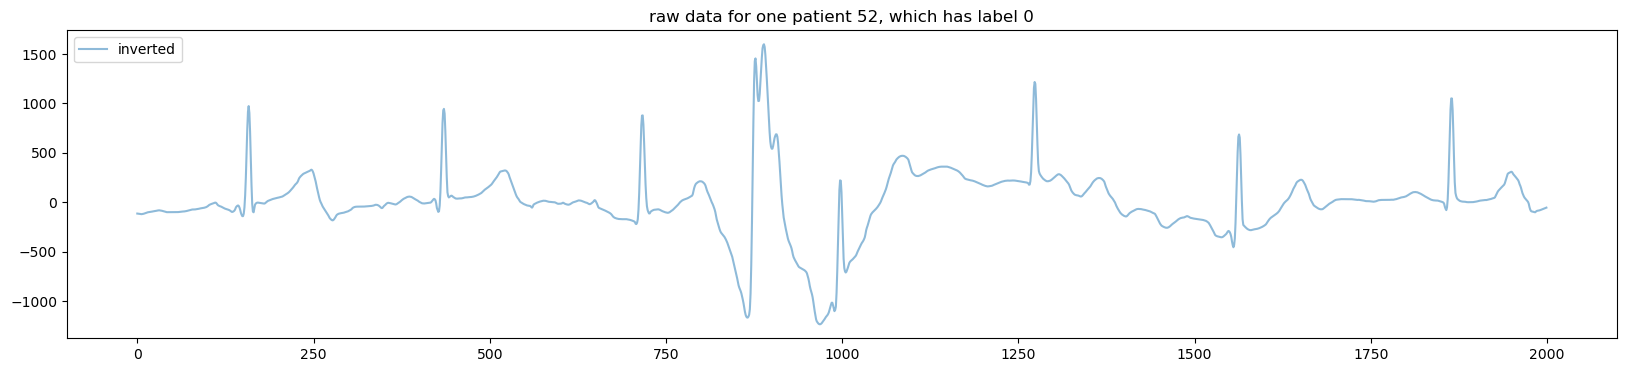

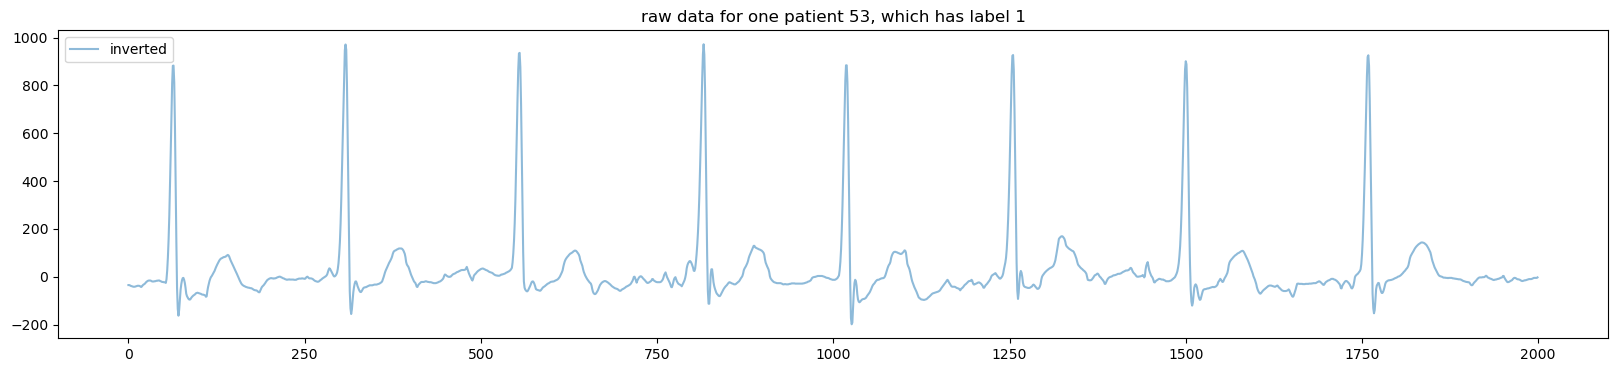

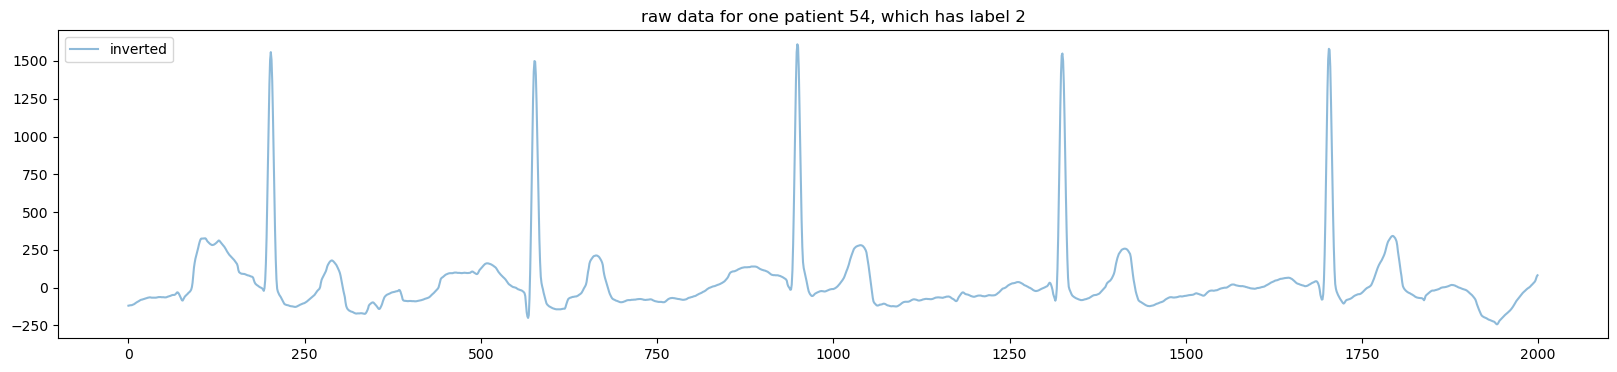

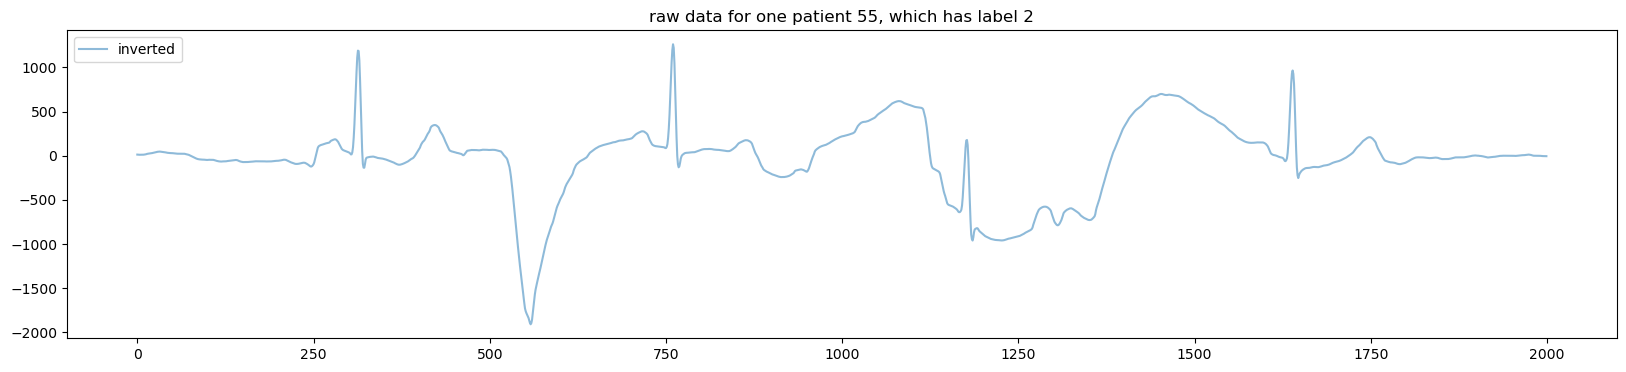

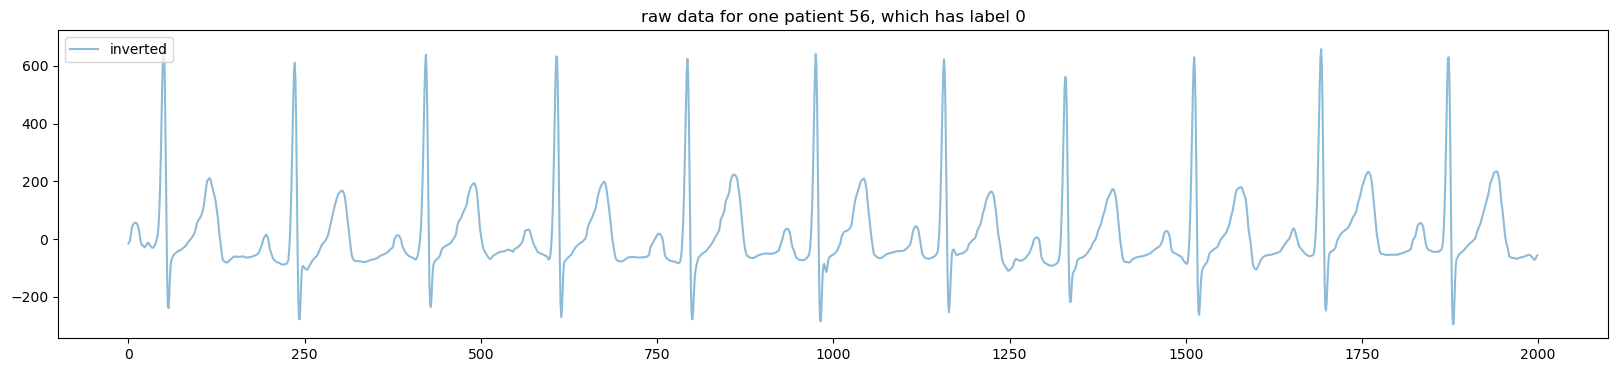

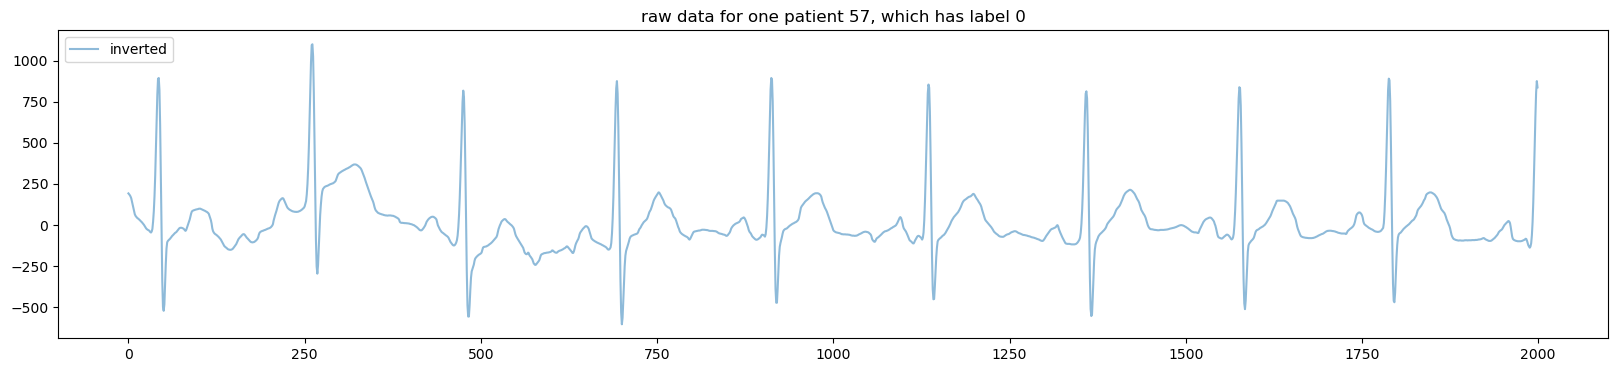

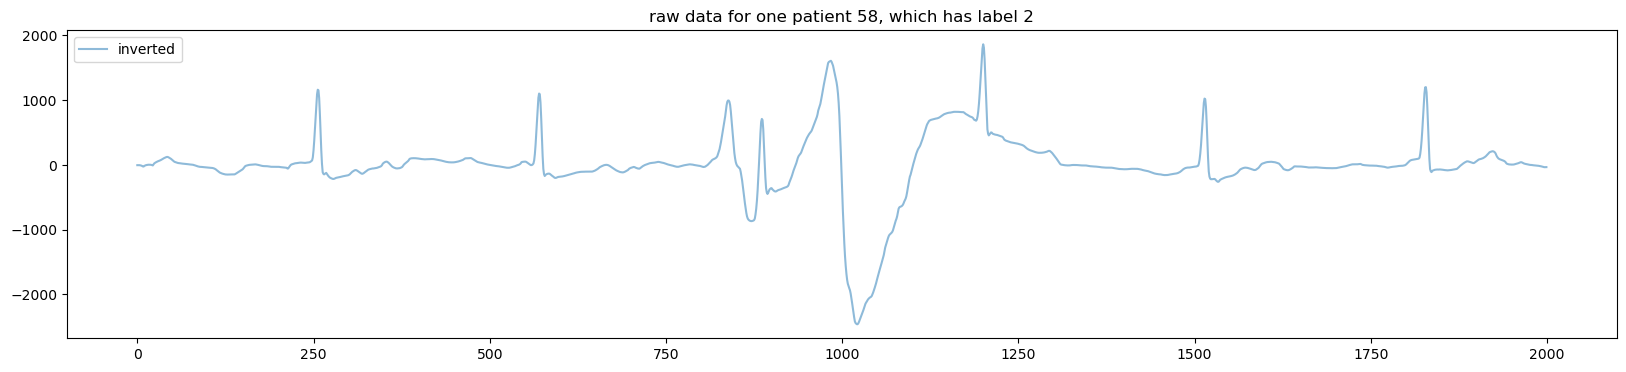

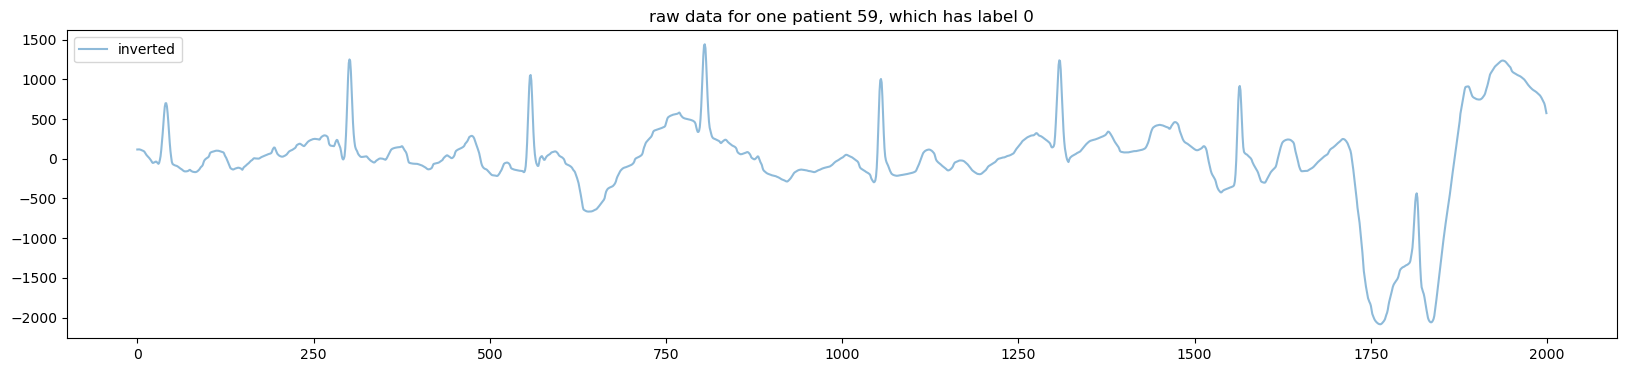

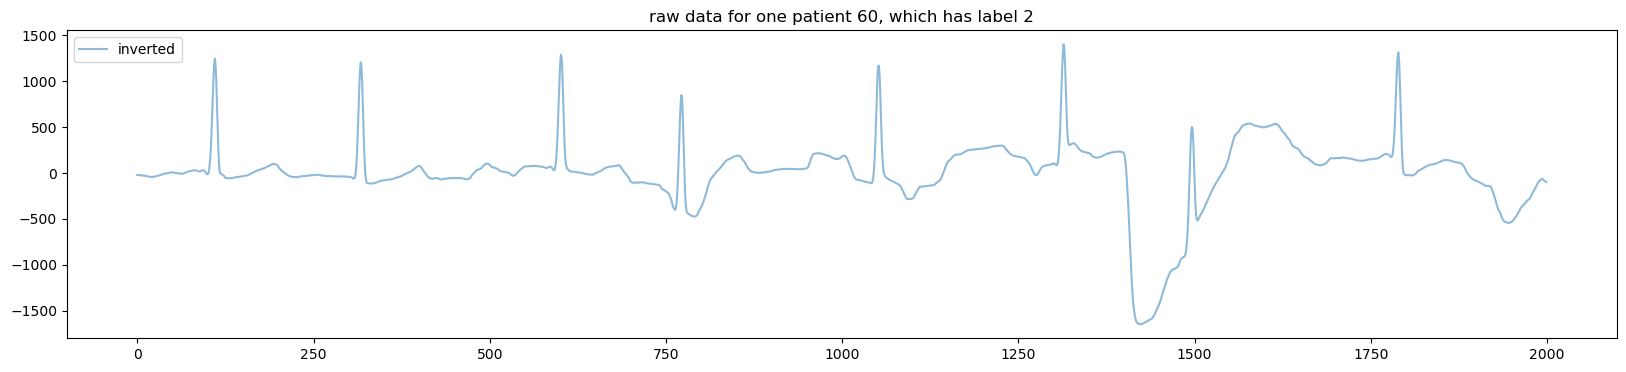

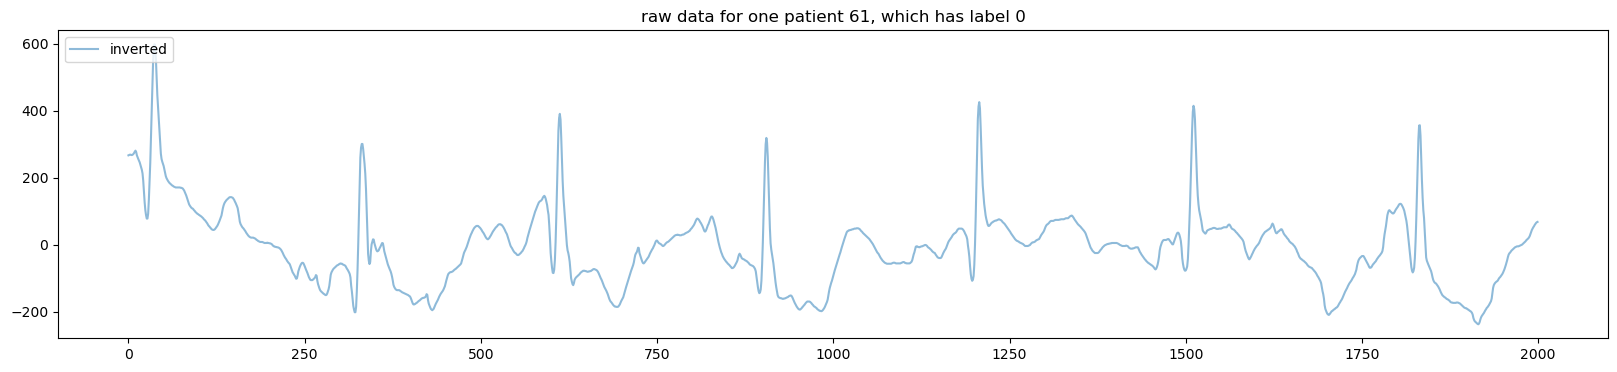

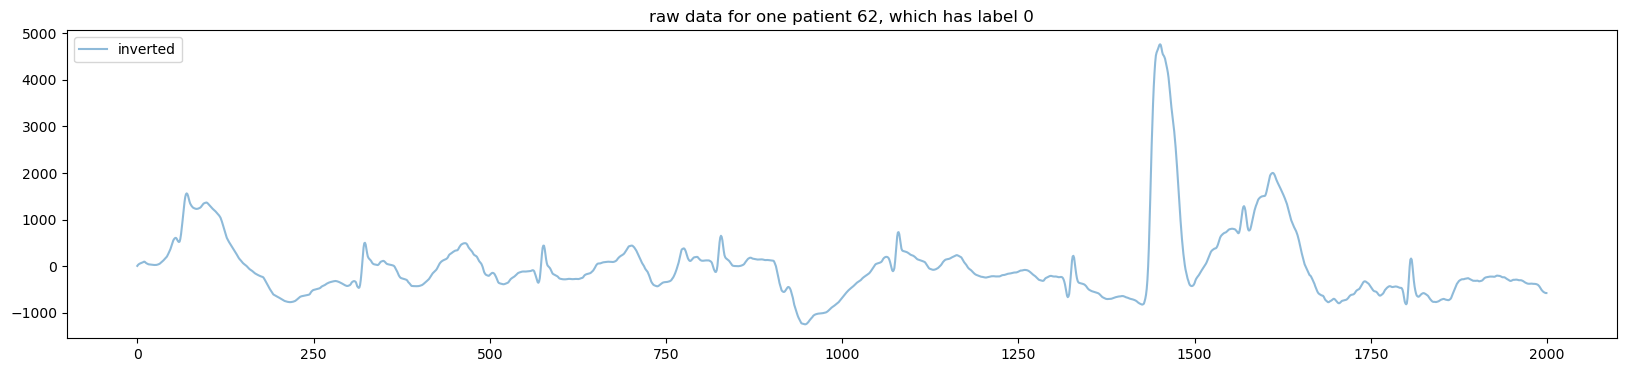

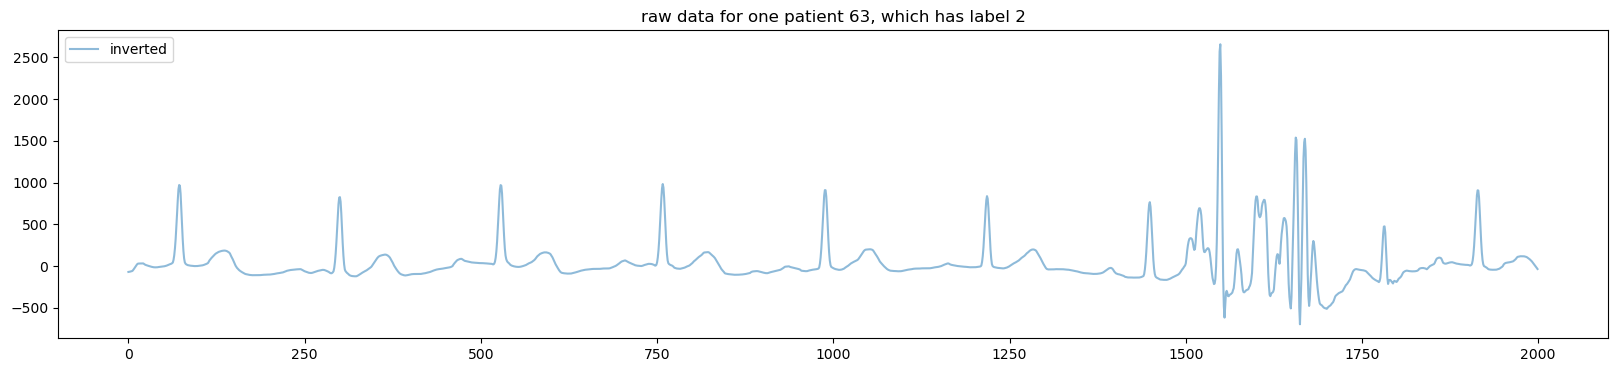

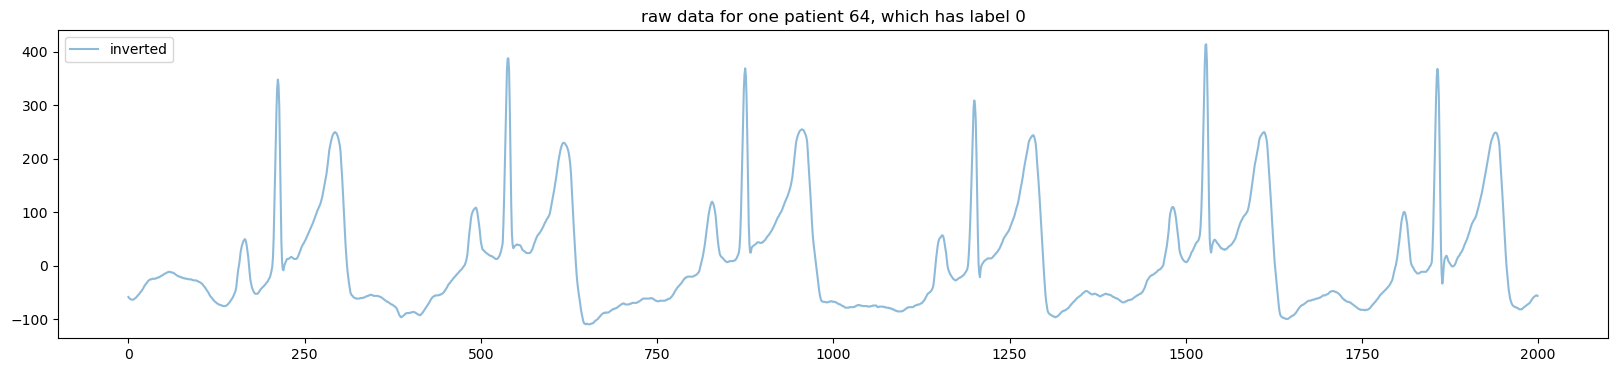

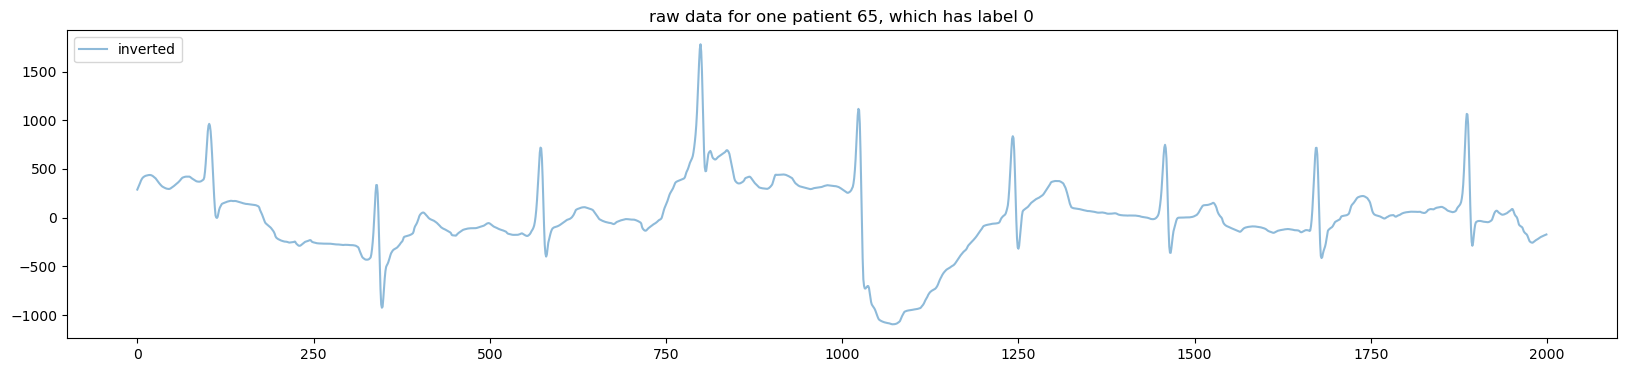

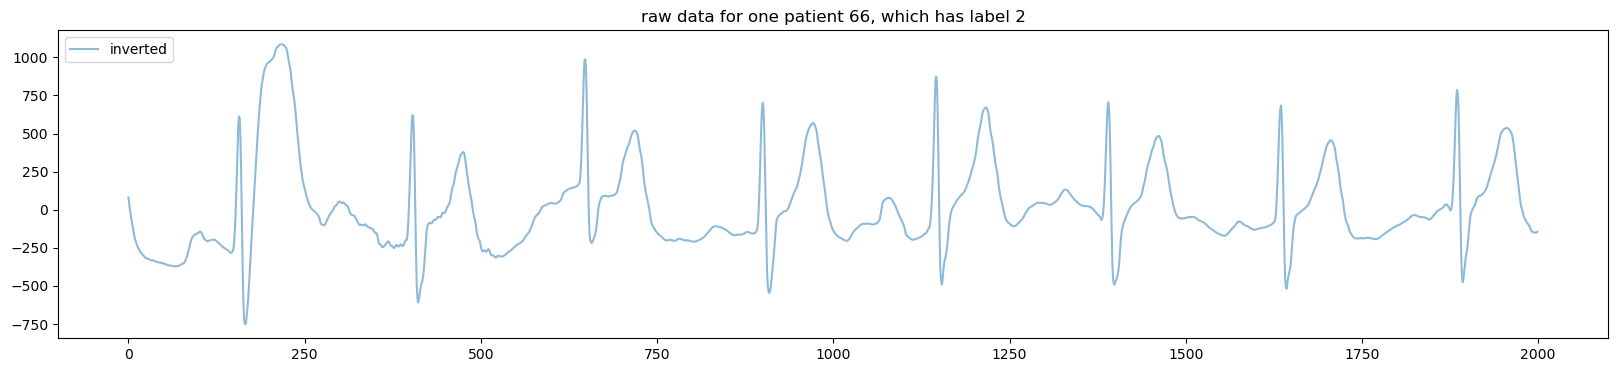

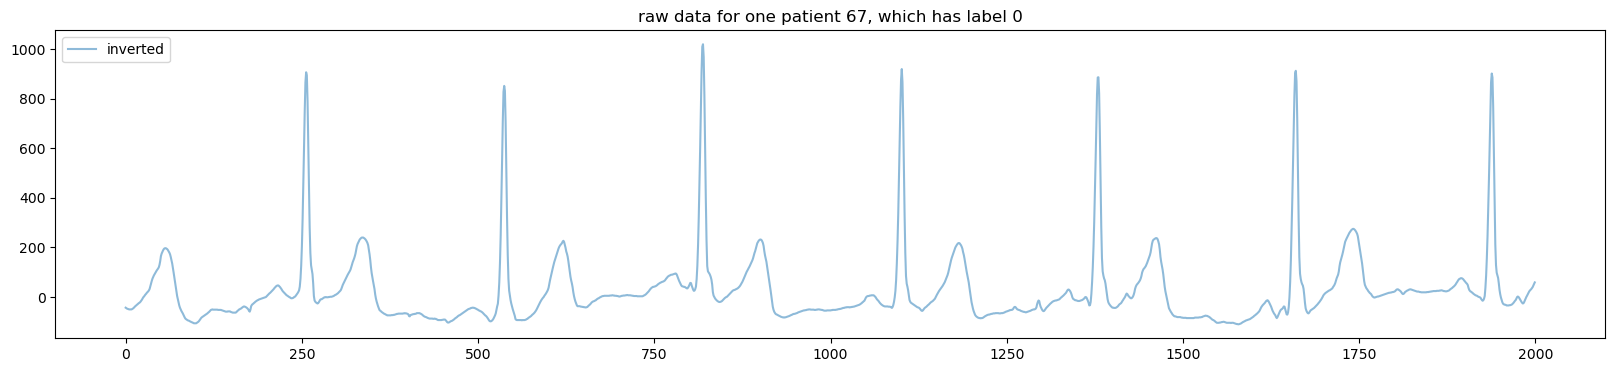

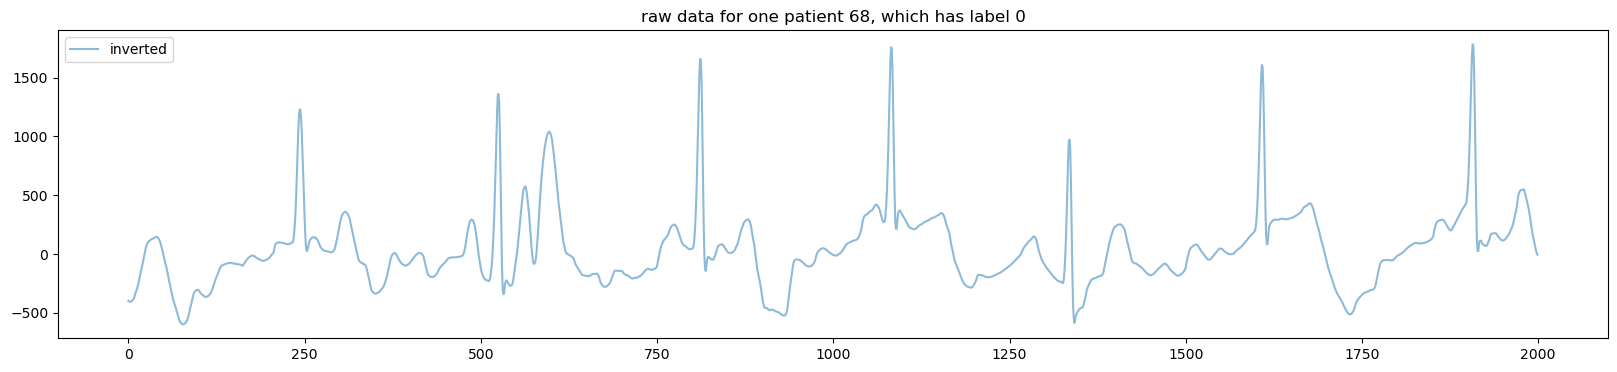

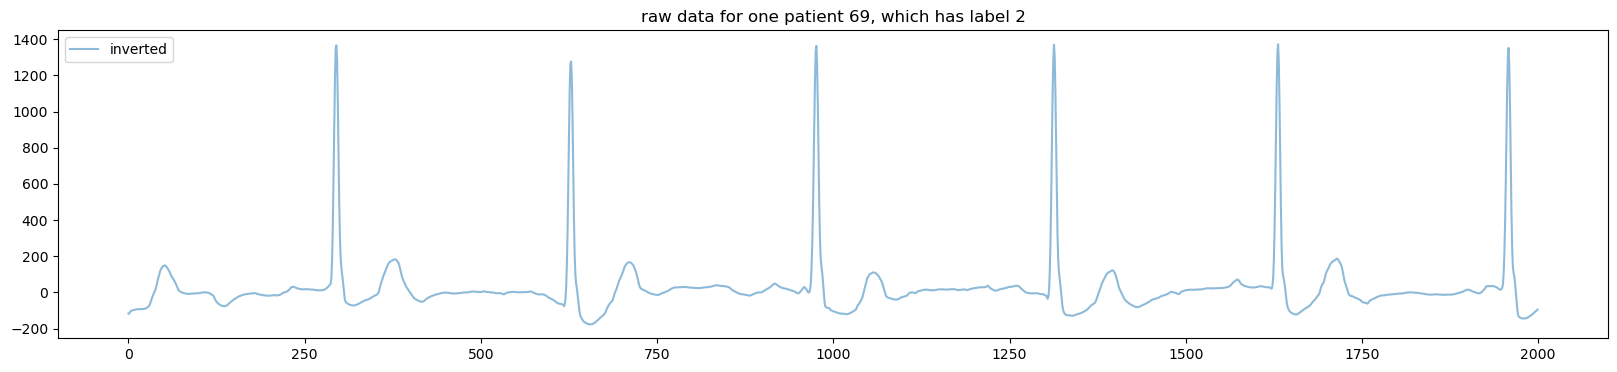

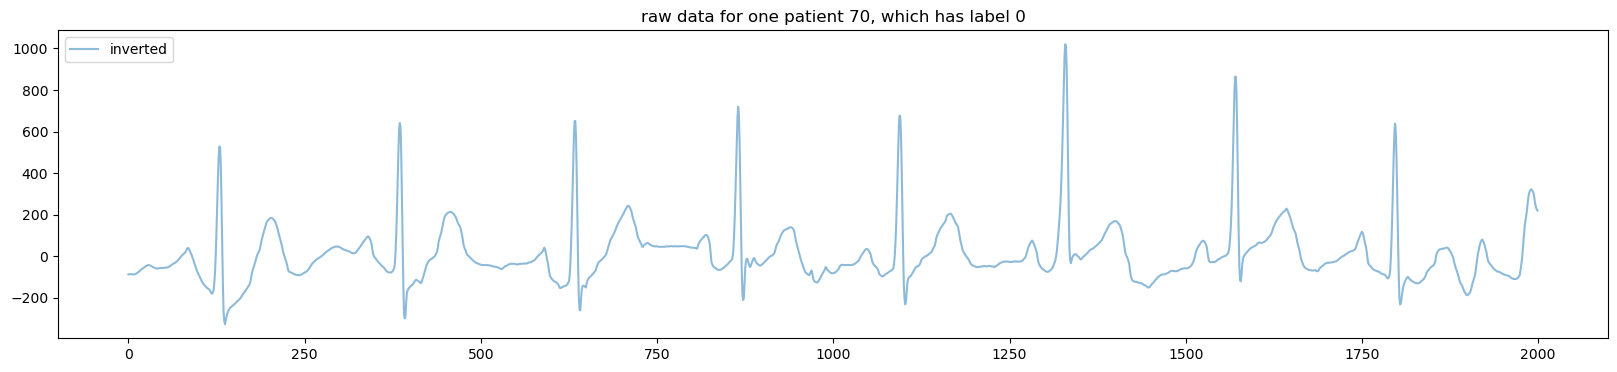

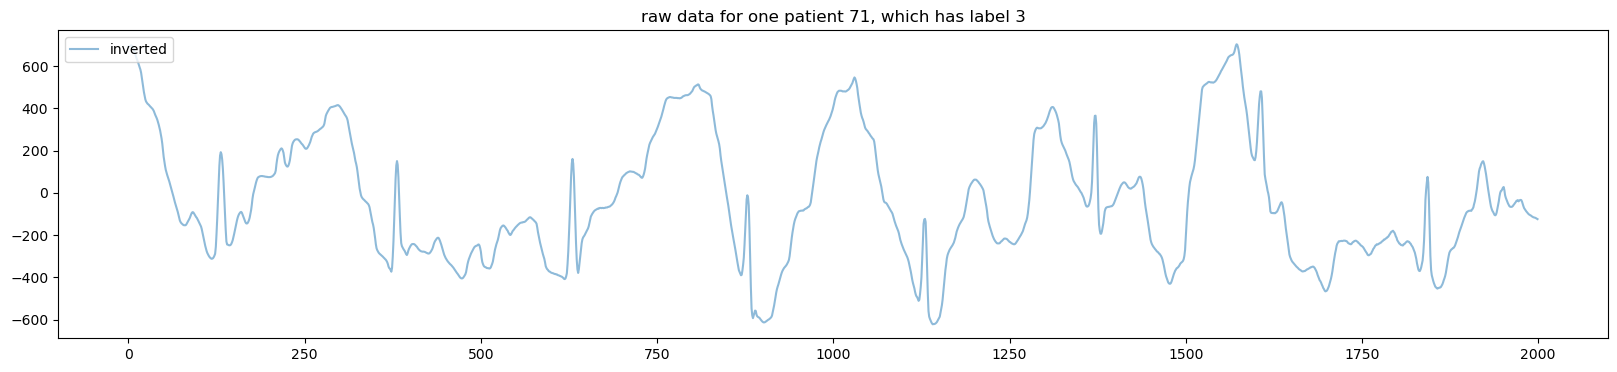

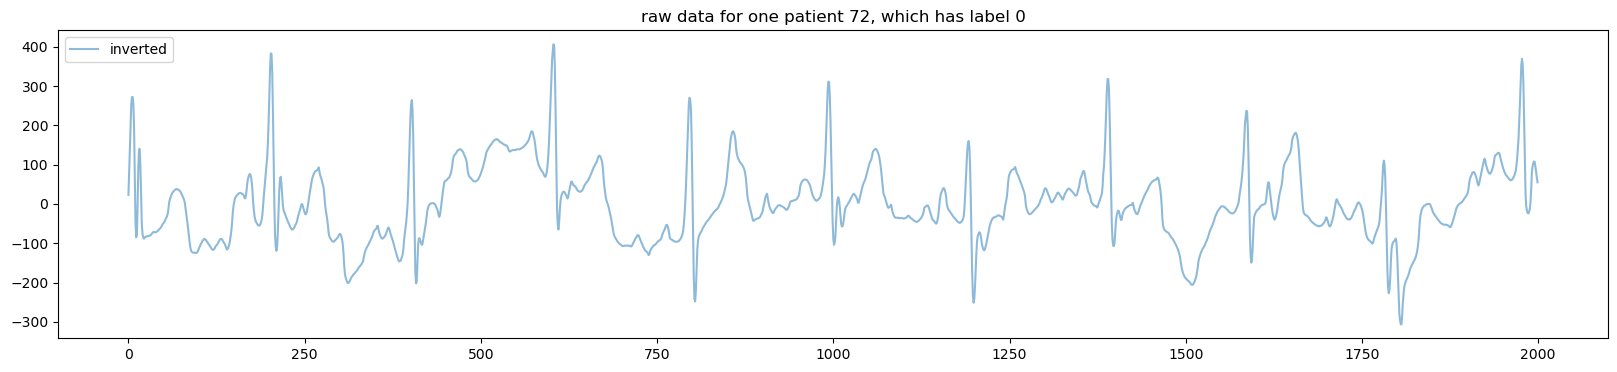

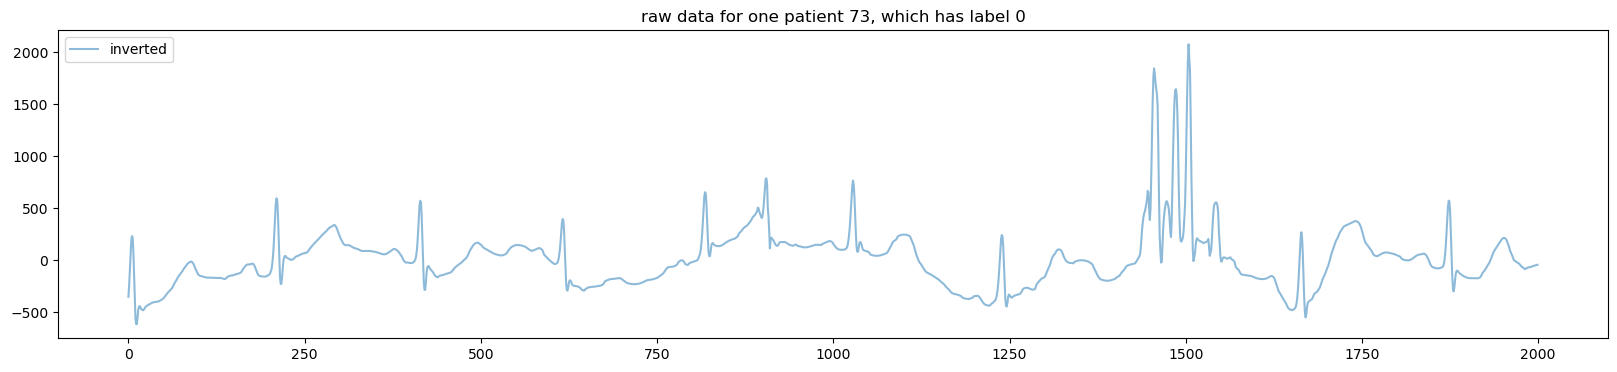

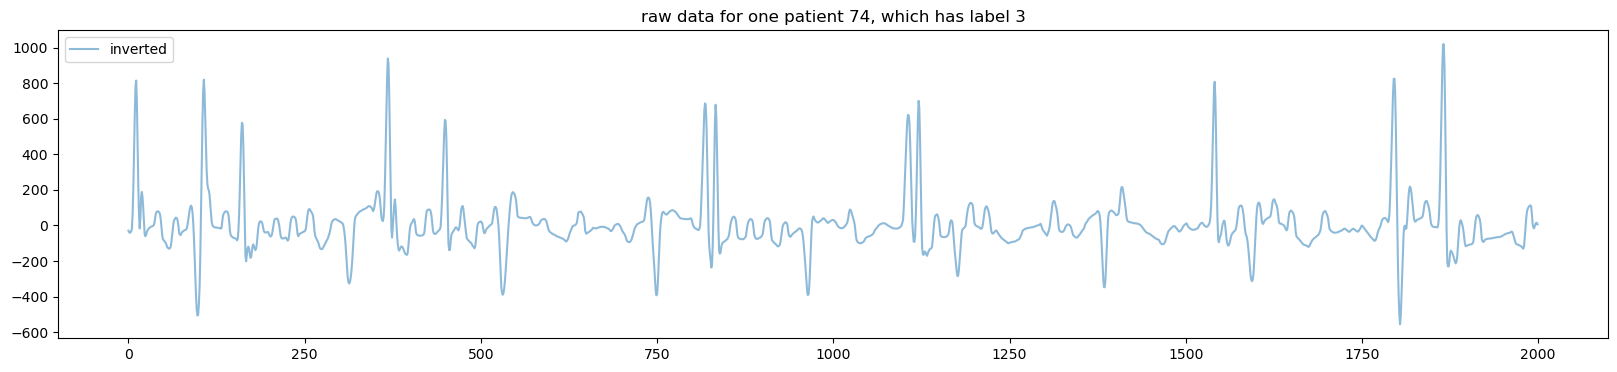

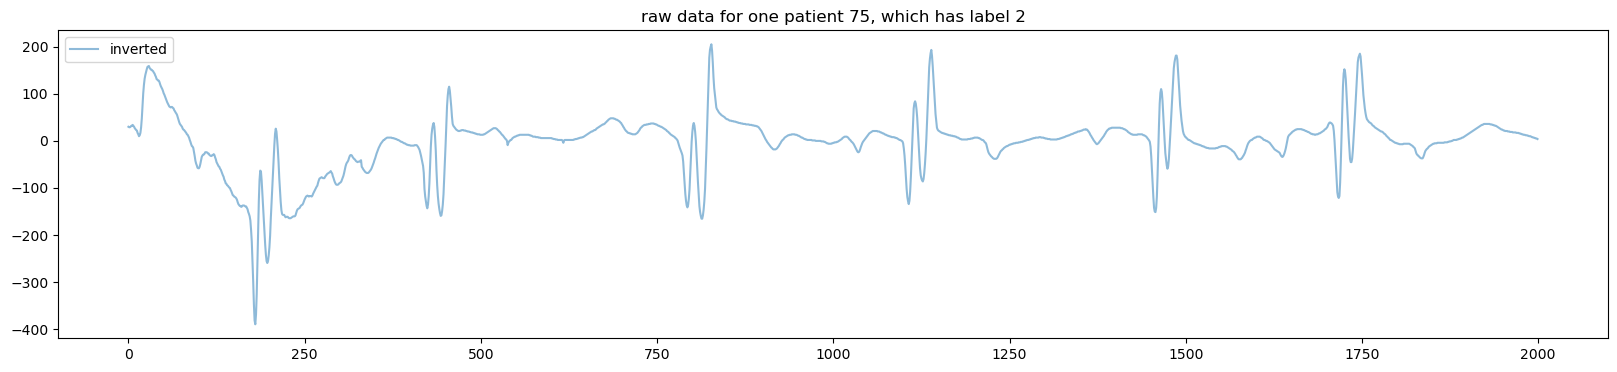

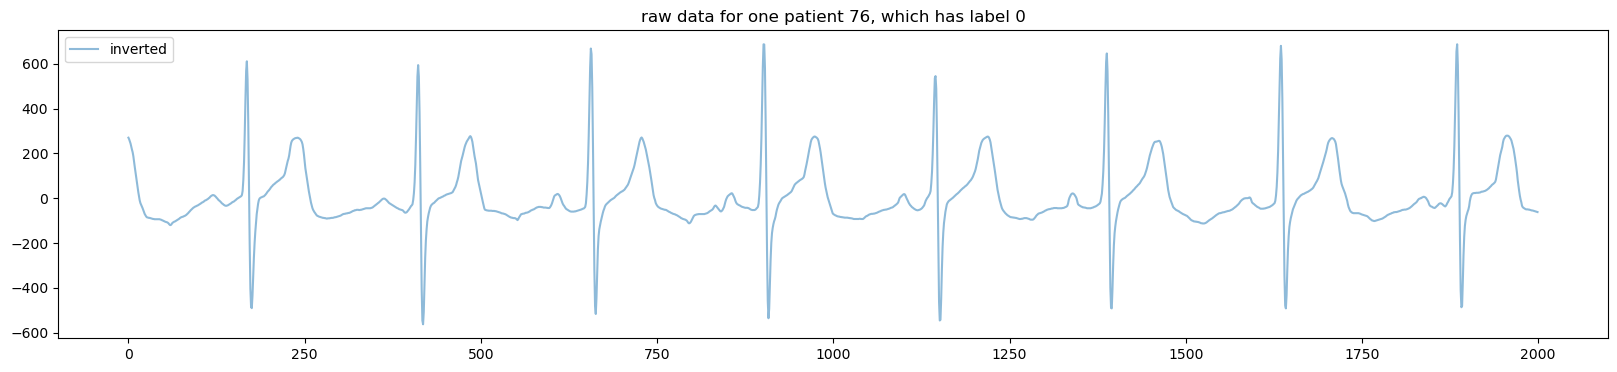

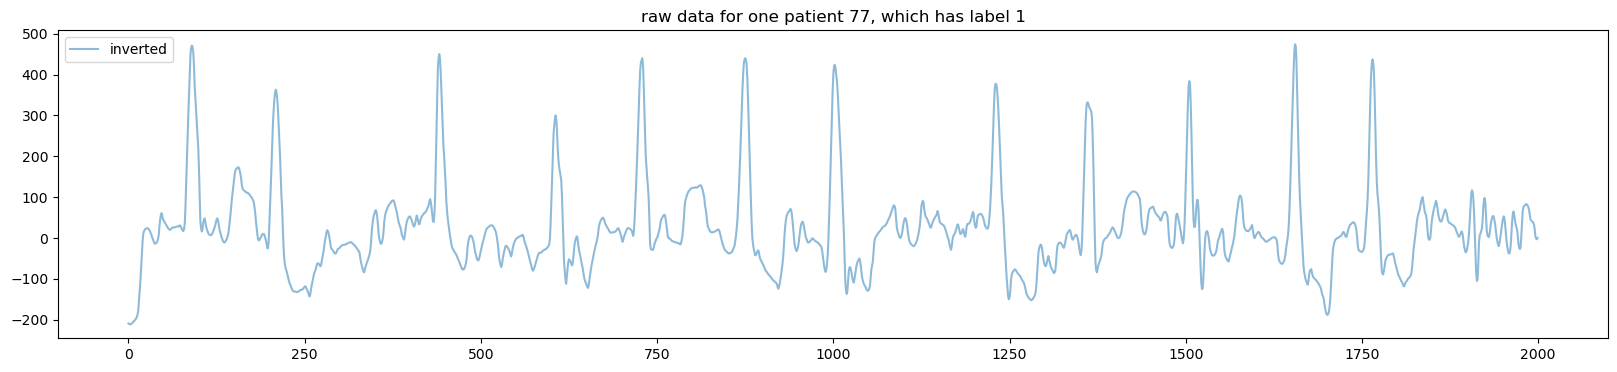

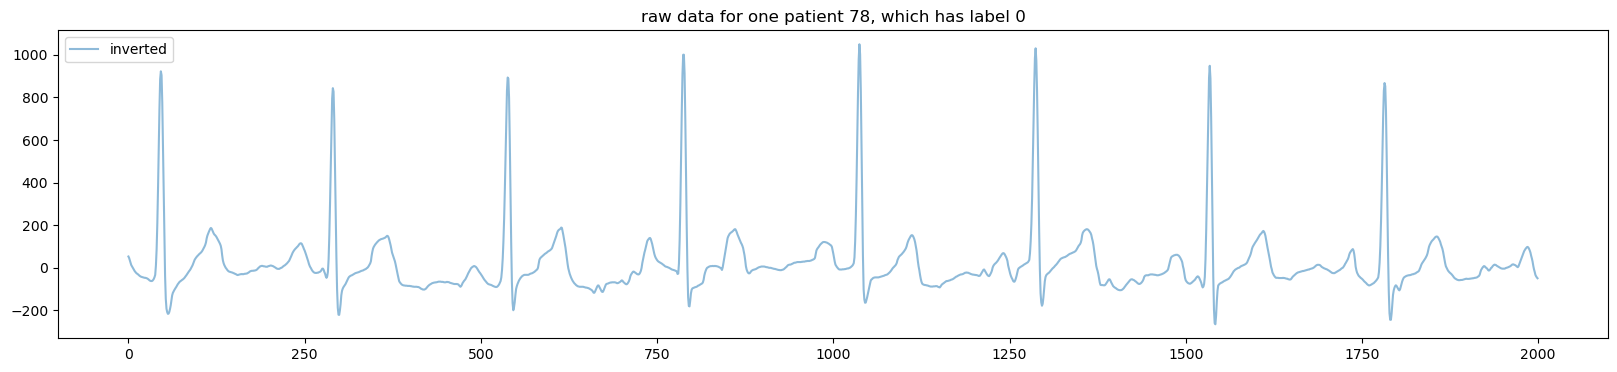

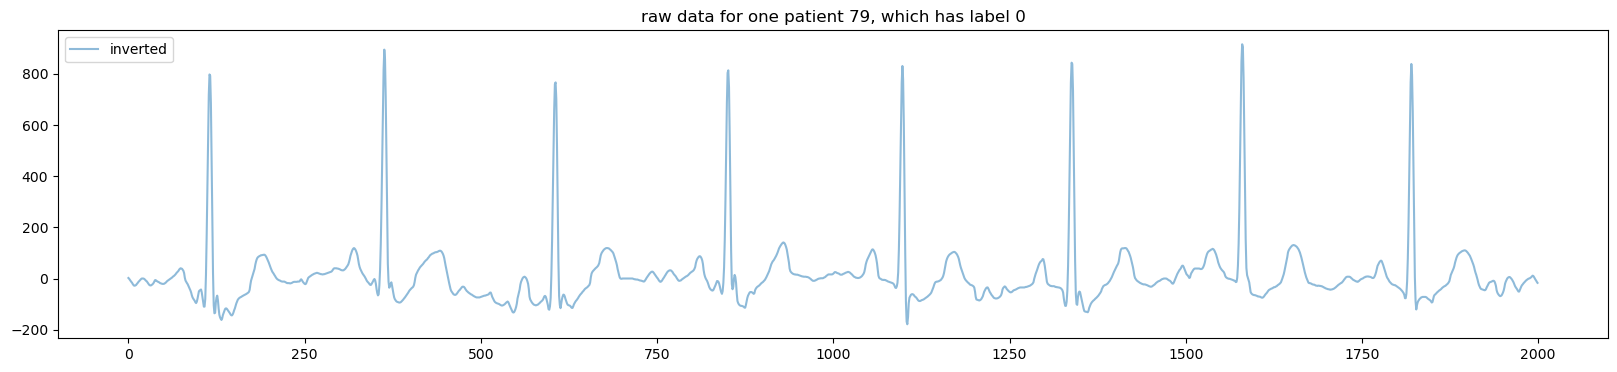

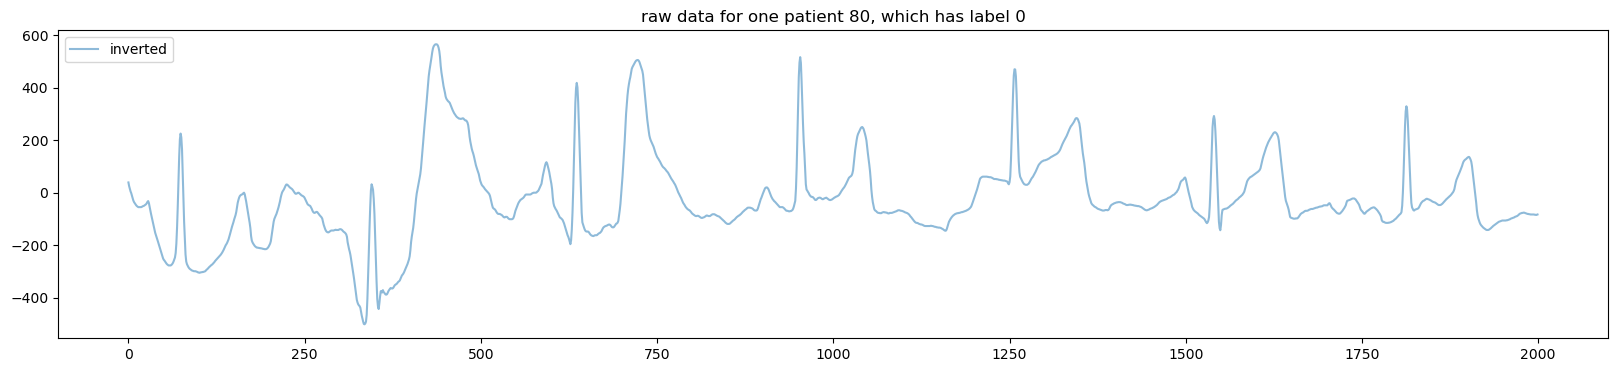

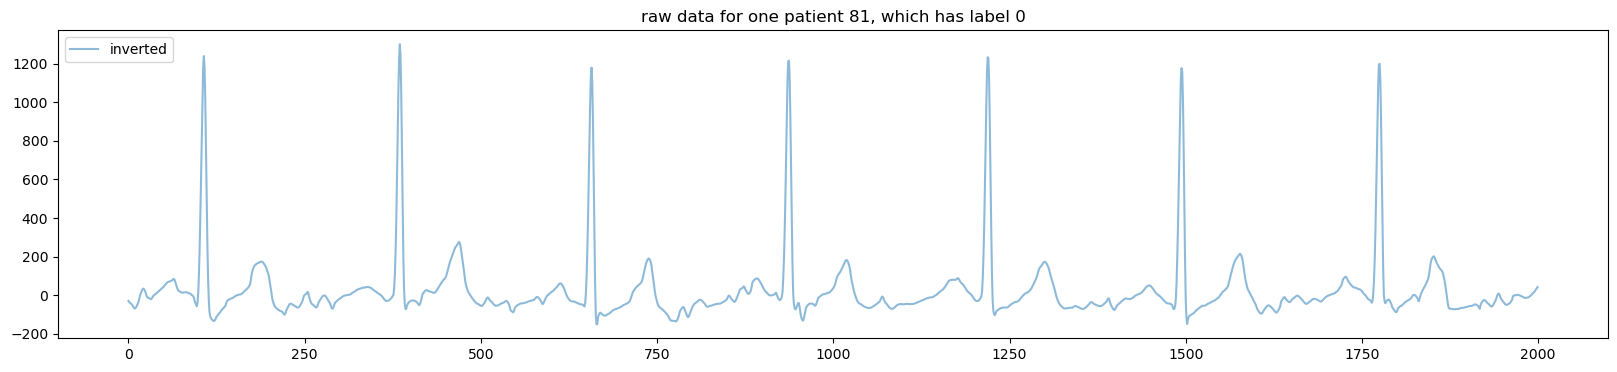

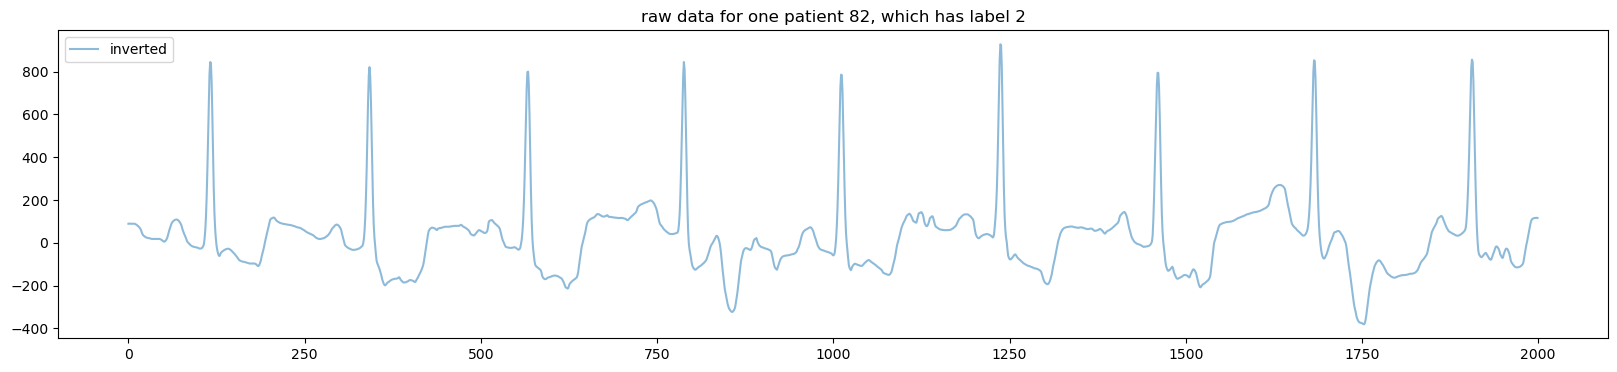

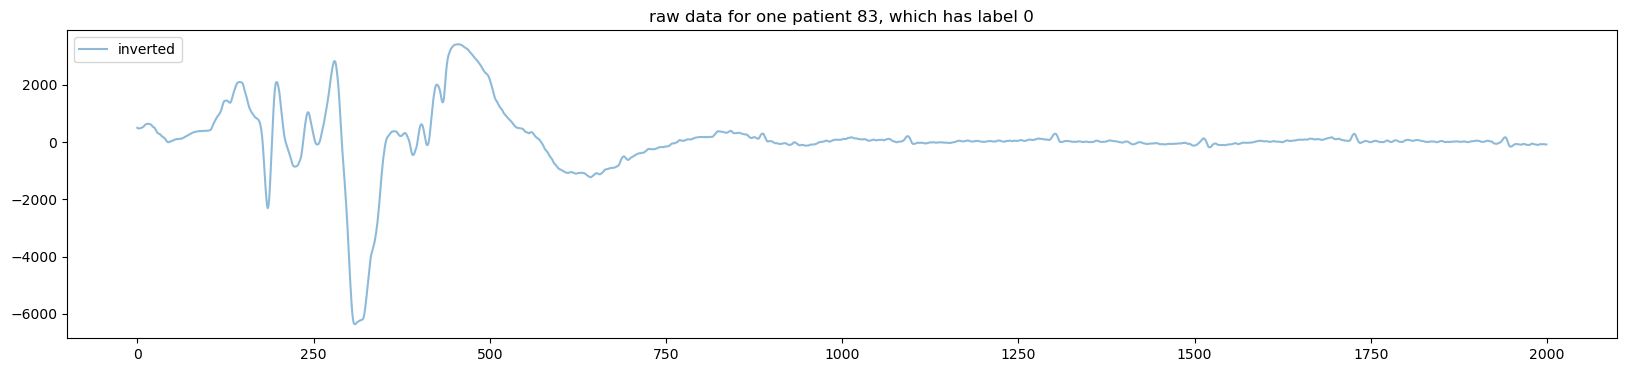

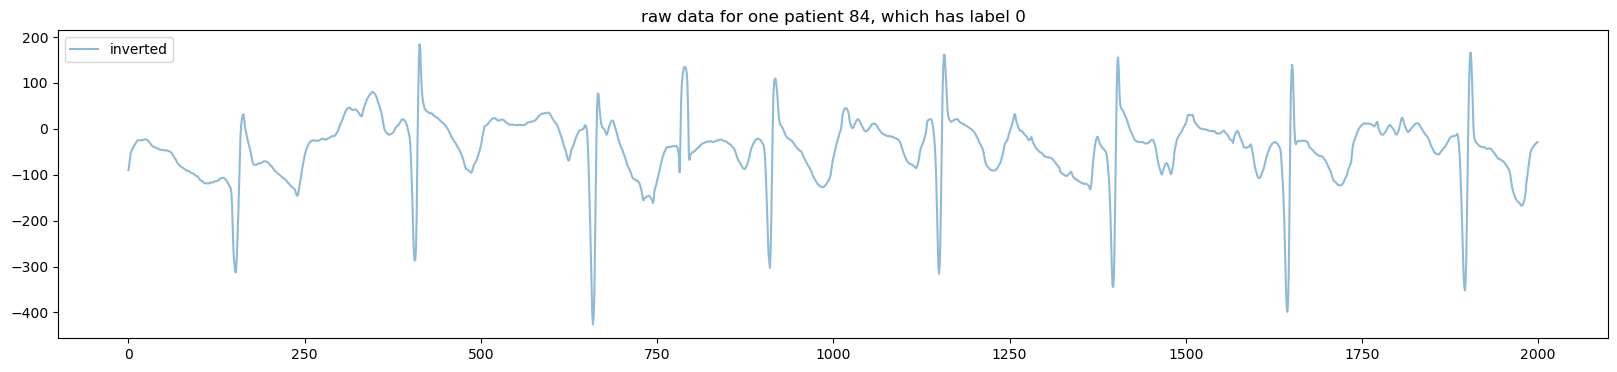

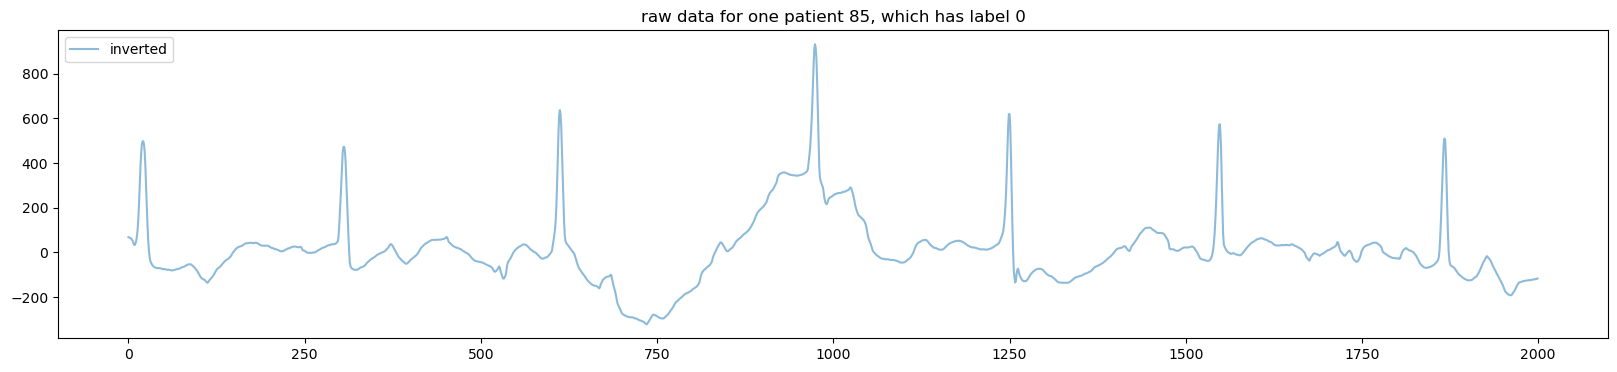

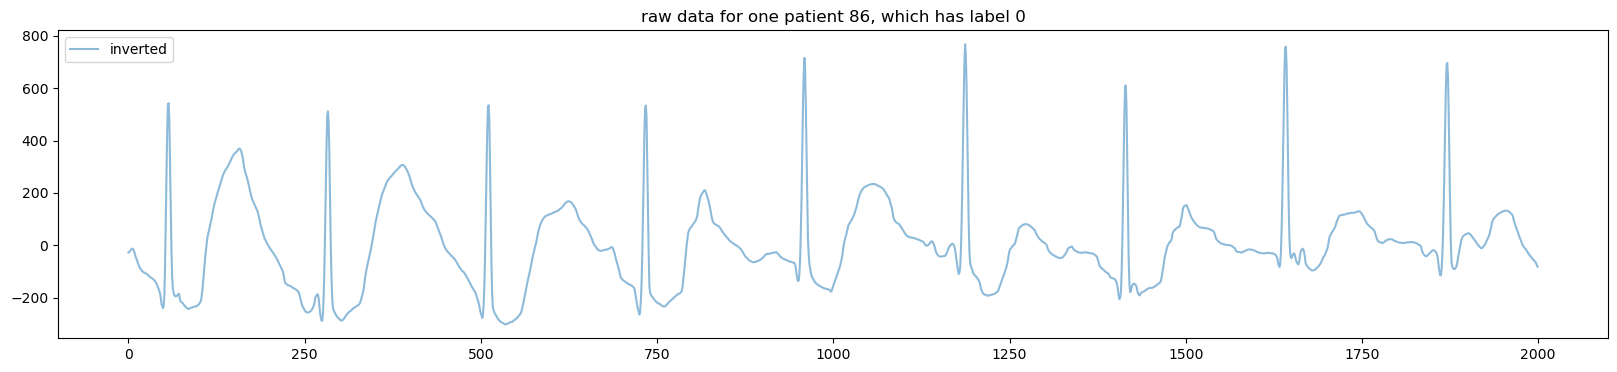

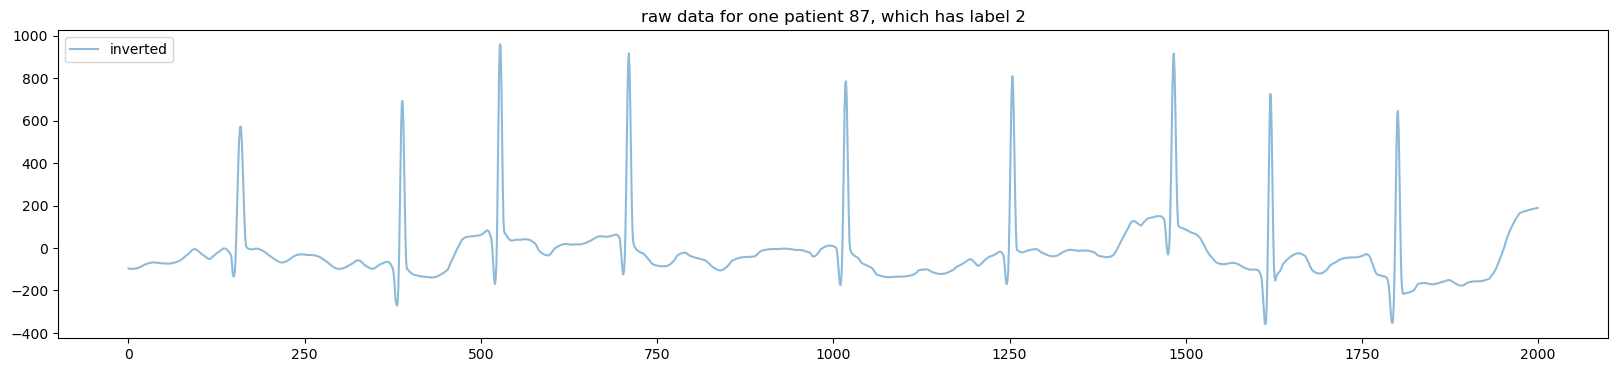

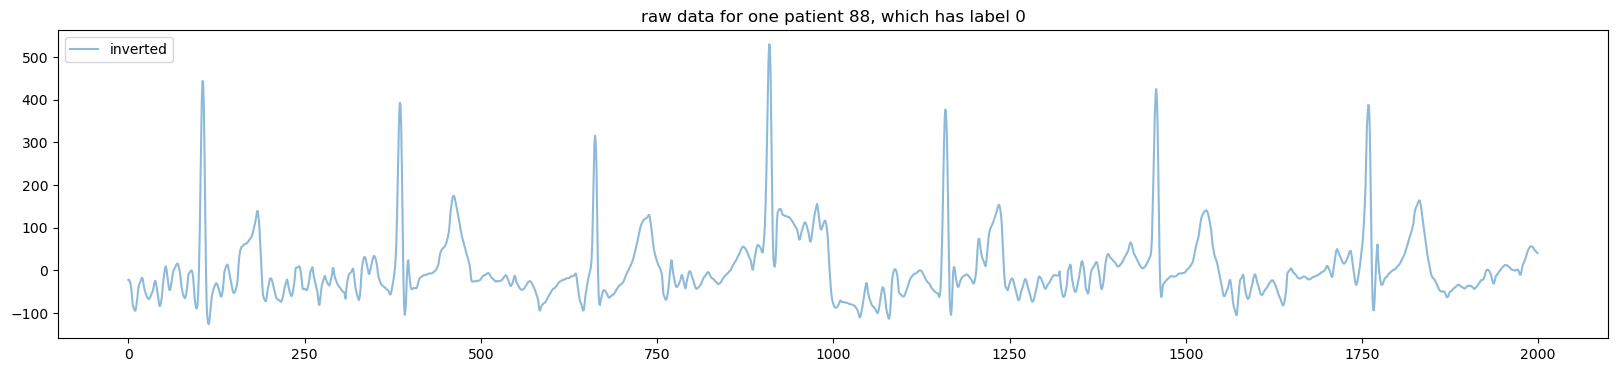

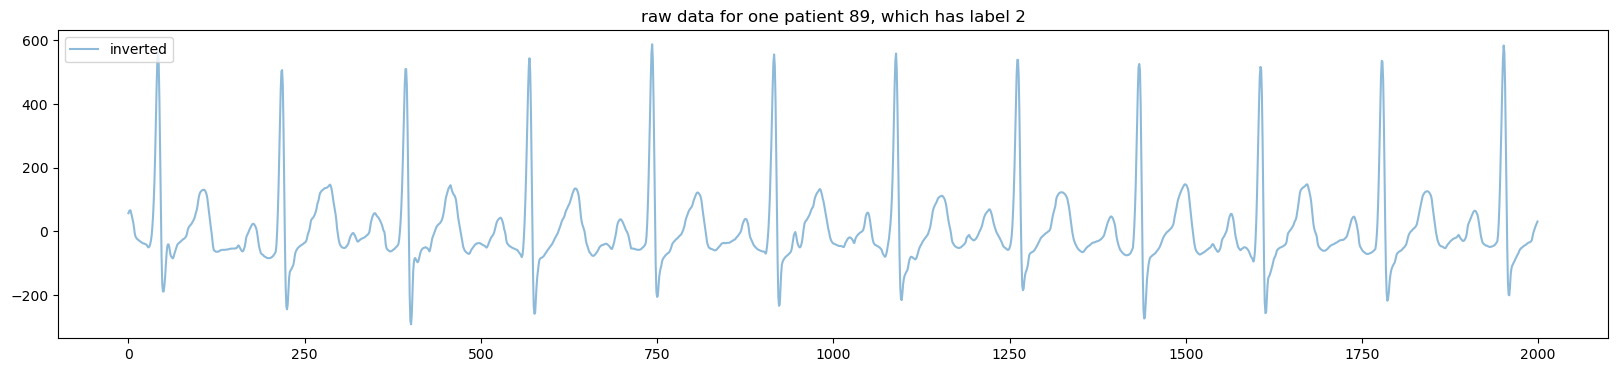

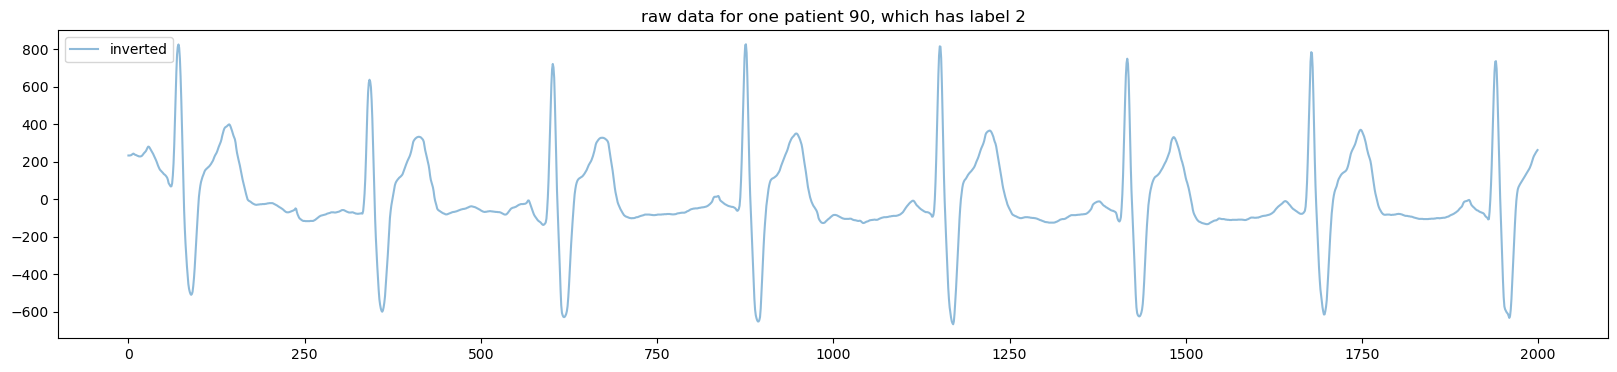

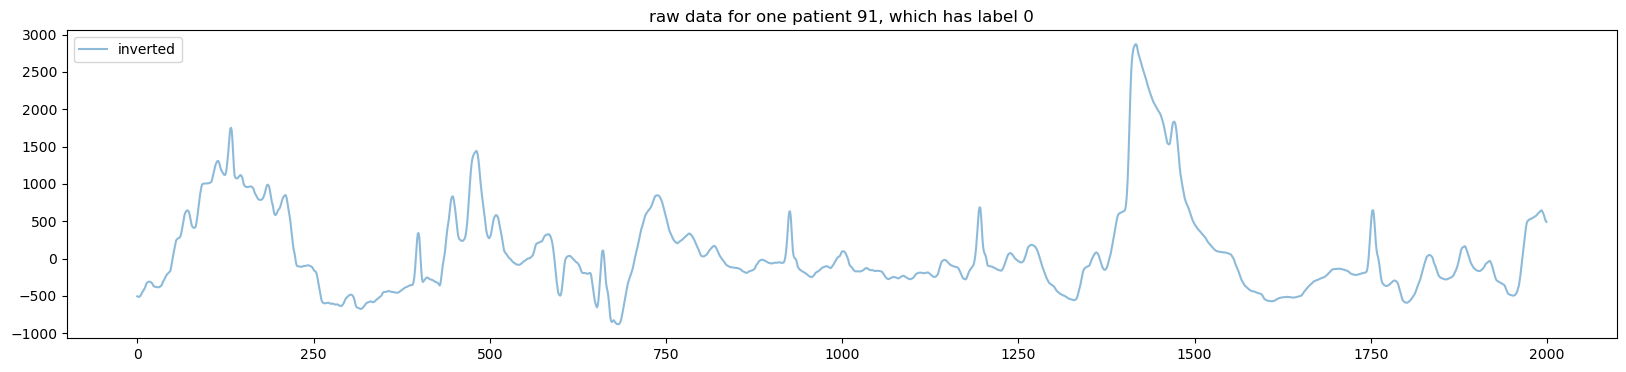

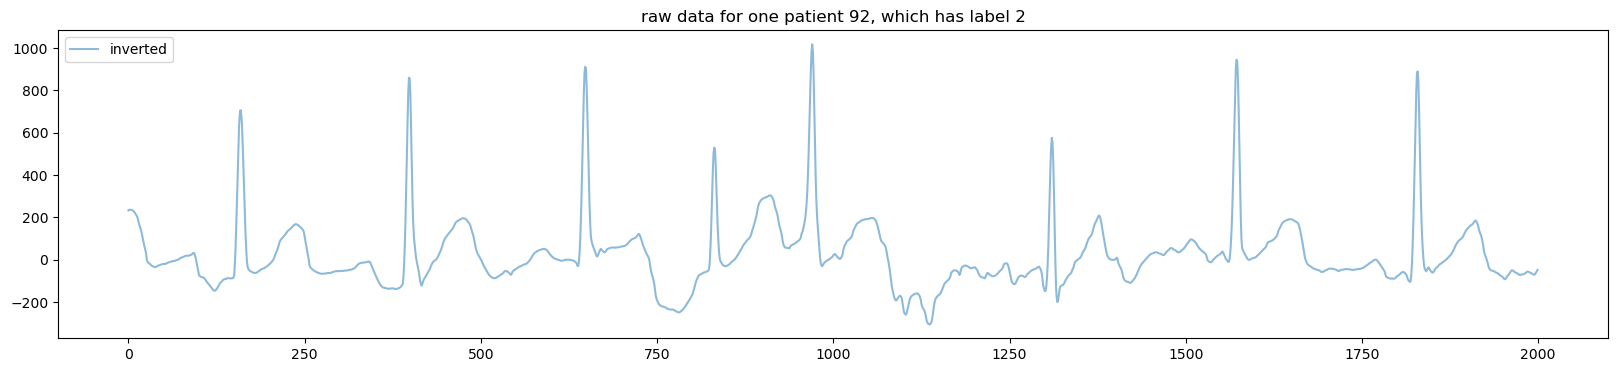

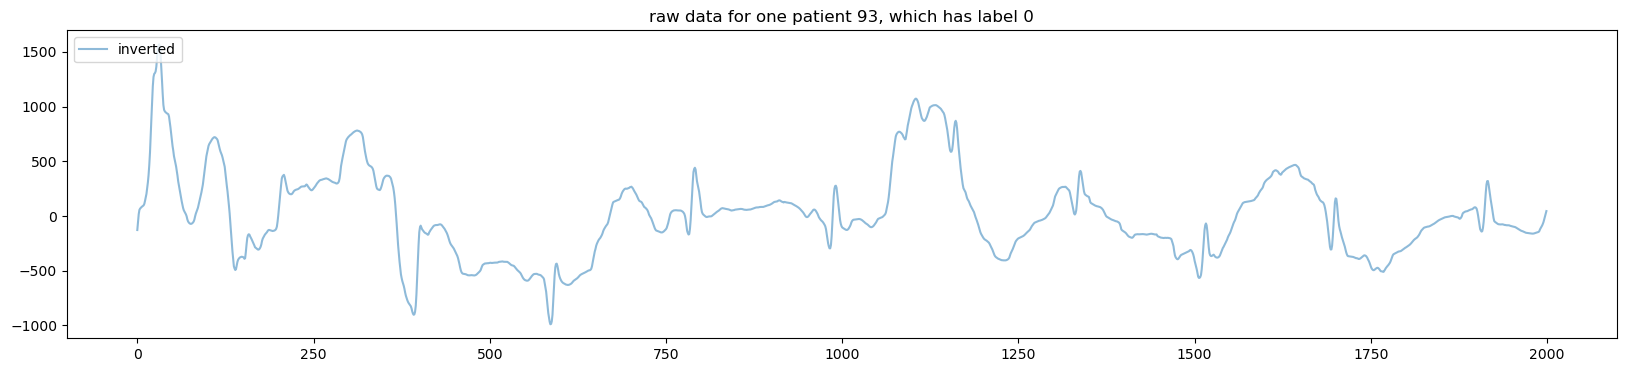

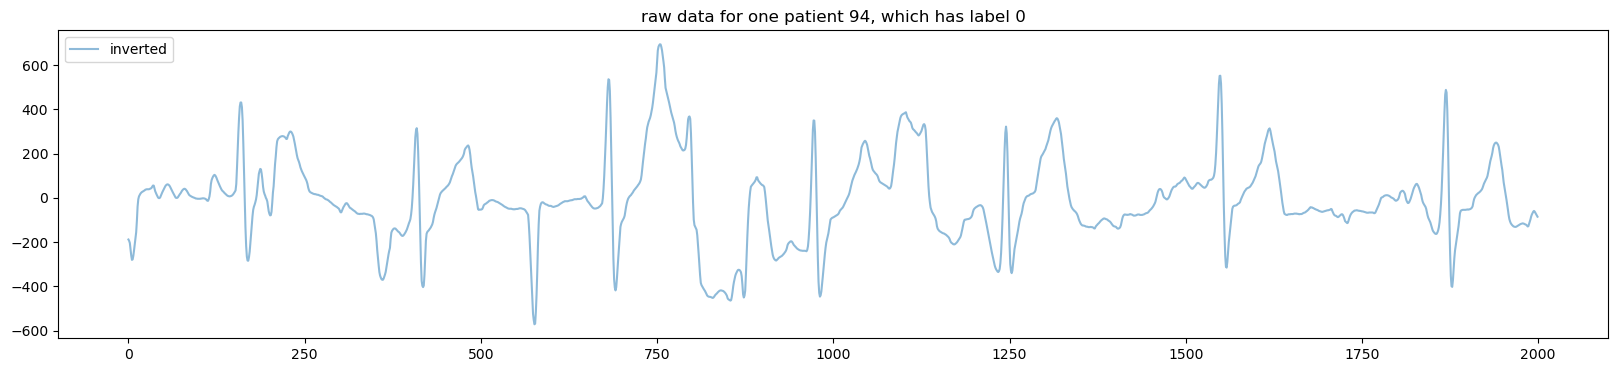

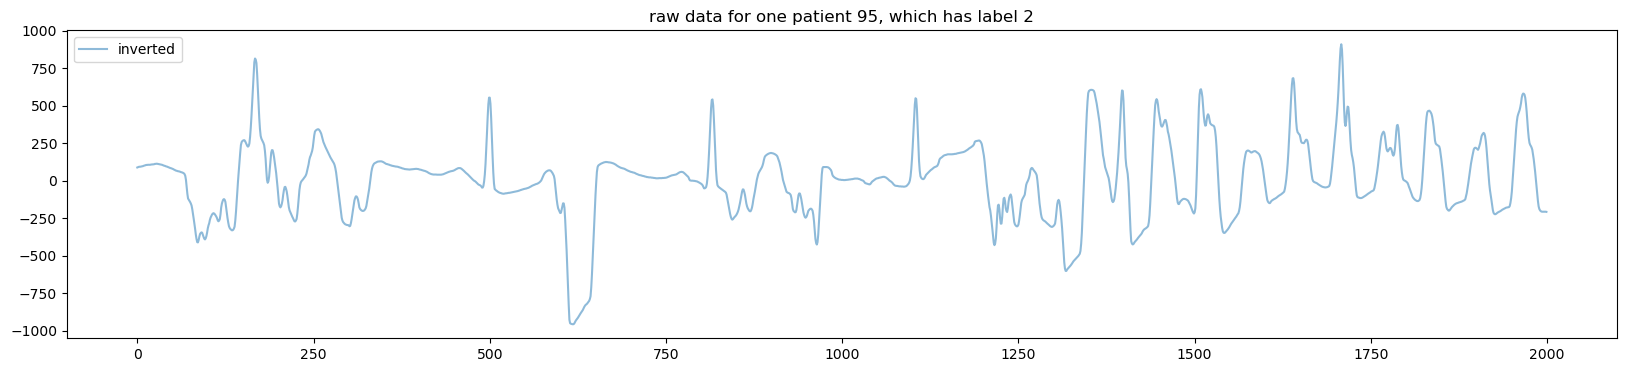

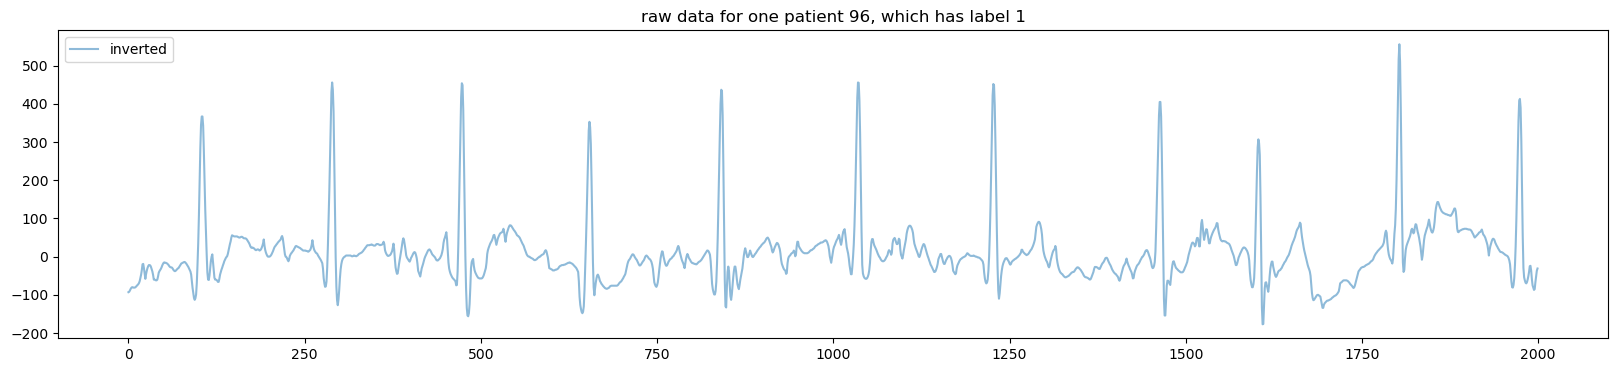

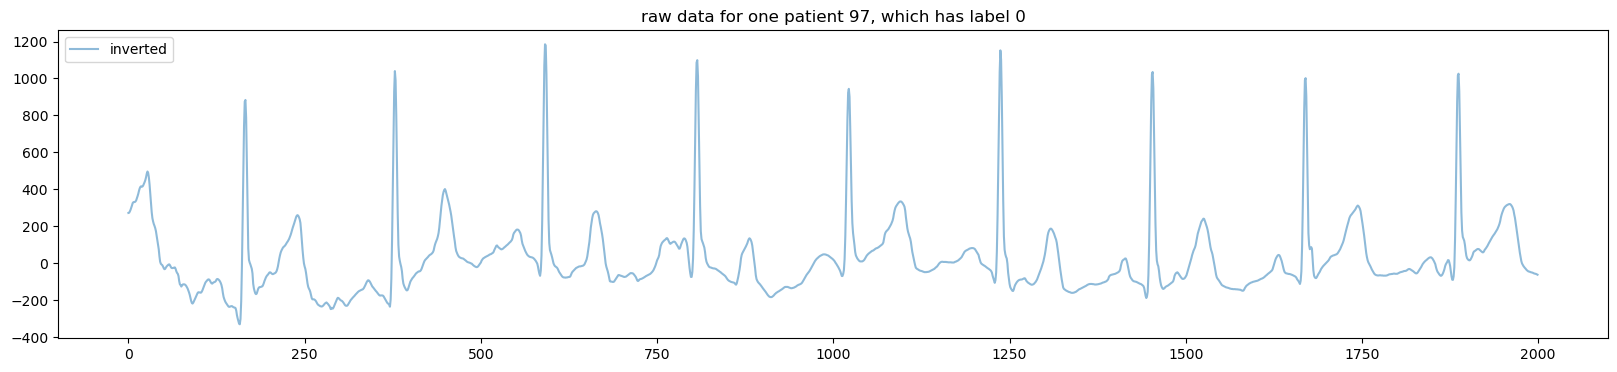

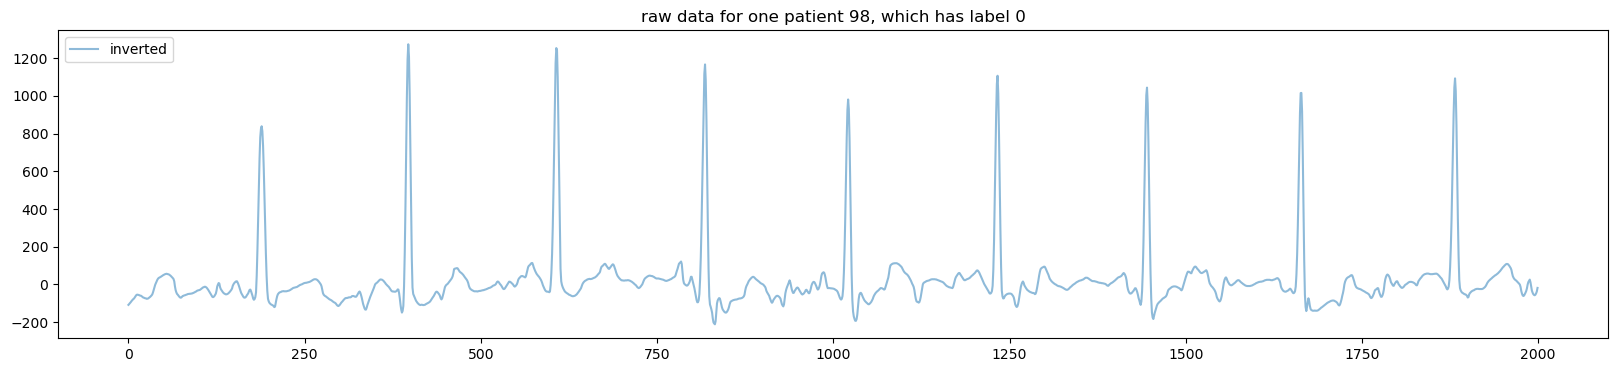

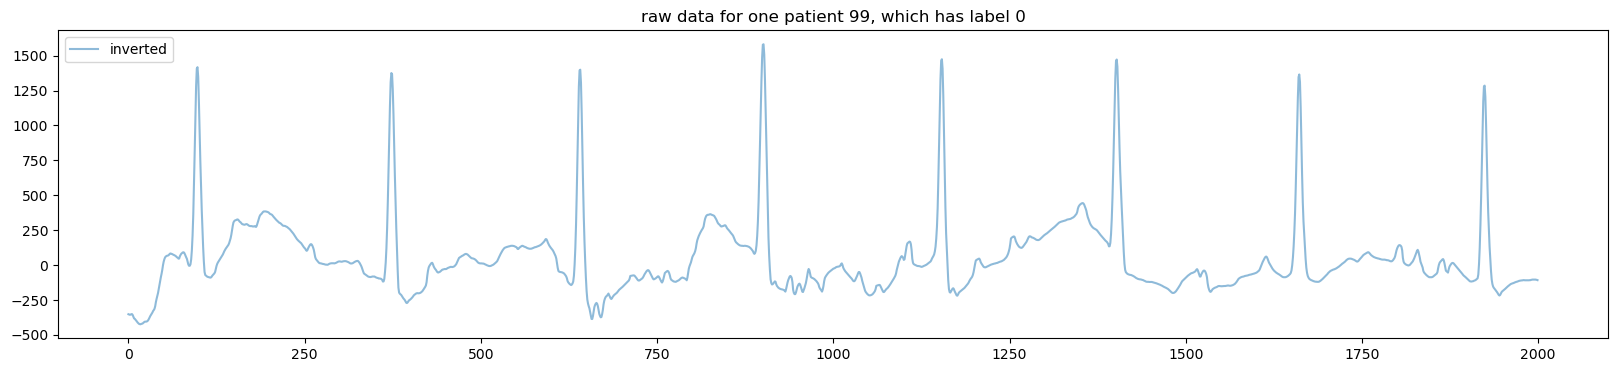

In [10]:
for i in range(100):
    # Get the raw recording without Nan values as a NumPy array
    pati = data.loc[i].dropna().to_numpy(dtype='float32')
    
    # filter the signal 
    filtered_i = ecg.ecg(pati, sampling_rate=300, show=False)['filtered']
    ecg_inverted, is_inverted = nk.ecg_invert(pati, sampling_rate=300, show=False)
    
    
    # plot the raw dat
    interval = pati[0:2000]
    filter_interval = filtered_i[0:2000]
    plt.figure(figsize=(20,4))
    plt.title(f"raw data for one patient {i}, which has label {labels.to_numpy().reshape(-1)[i]}")
    #plt.plot(range(interval.shape[0]), interval, alpha=0.5, label='ecg signal')
    # plt.plot(range(interval.shape[0]), ecg_inverted[0:2000], alpha=0.5, label='inverted')
    #plt.plot(range(filter_interval.shape[0]), filter_interval, label='filtered ecg signal')
    plt.legend(loc='upper left')
    plt.show()

# now try using neurokit2


In [6]:
import neurokit2 as nk

# Invert the data

False


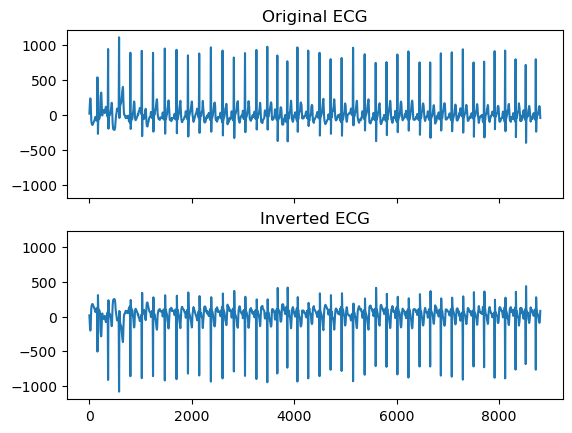

In [32]:
pat3 = data.loc[6].dropna().to_numpy(dtype='float32')
ecg_fixed, is_inverted = nk.ecg_invert(pat3, sampling_rate=300, show=True)
print(is_inverted)

# perform automatic preprocessing

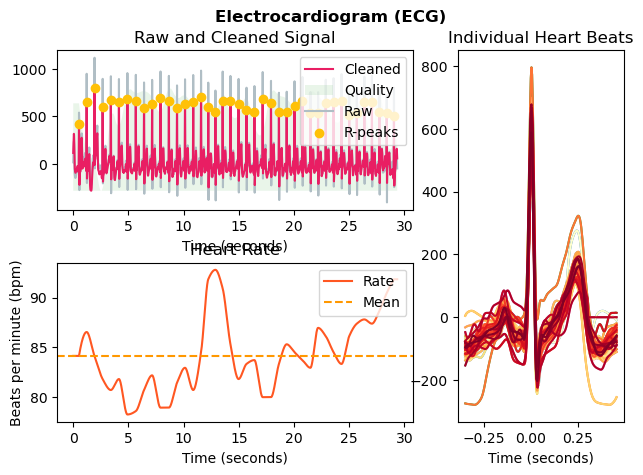

In [33]:
# automatic processing pipeline
signals, info = nk.ecg_process(ecg_signal=pat3, sampling_rate=300)
nk.ecg_plot(signals, info, 300)

# perform cleaning of the data using different filters/methods

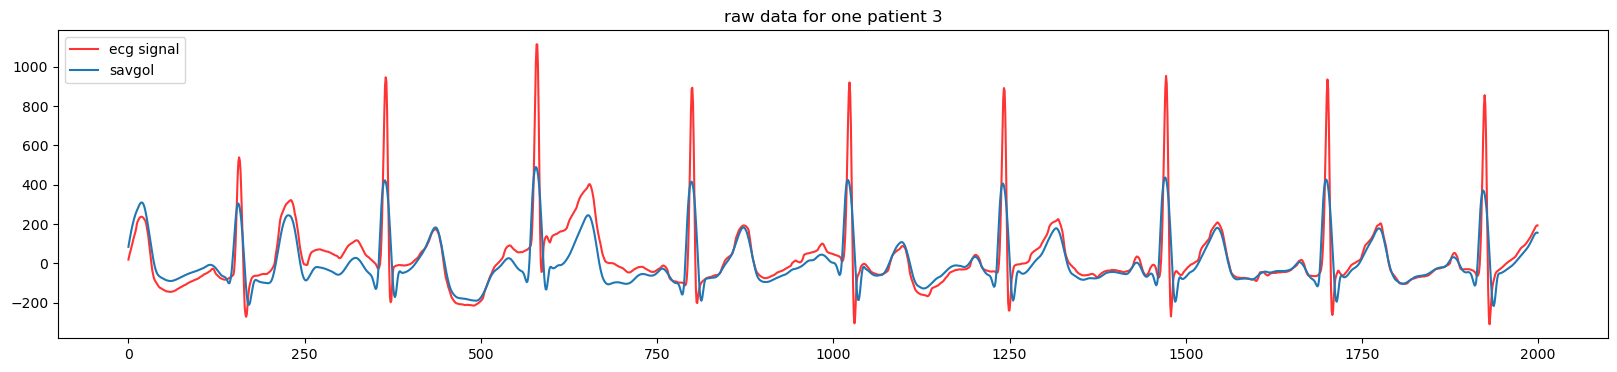

In [61]:
# cleans the data
clean = nk.ecg_clean(ecg_signal=pat3, sampling_rate=300, method='neurokit')
bandpass = nk.signal_filter(pat3, 300, lowcut=1, highcut=100, method='butterworth')
savgol = nk.signal_filter(bandpass, 300, method='savgol', window_size=27)
clean2 = nk.ecg_clean(pat3, sampling_rate=300, method='biosppy', show=True)


interval = pat3[0:2000]
filter_interval = clean[0:2000]
filtered_interval_2 = clean2[0:2000]

plt.figure(figsize=(20,4))
plt.title(f"raw data for one patient 3")
plt.plot(range(interval.shape[0]), interval,alpha=0.8, label='ecg signal', color='red')
#plt.plot(range(filter_interval.shape[0]), filter_interval, label='cleaned ecg signal')
#plt.plot(range(filter_interval.shape[0]), filtered_interval_2, label='biosppy')
#plt.plot(range(2000), bandpass[0:2000], label='bandpass')
plt.plot(range(2000), savgol[0:2000], label='savgol')
plt.legend(loc='upper left')
plt.show()

# extract individual beats

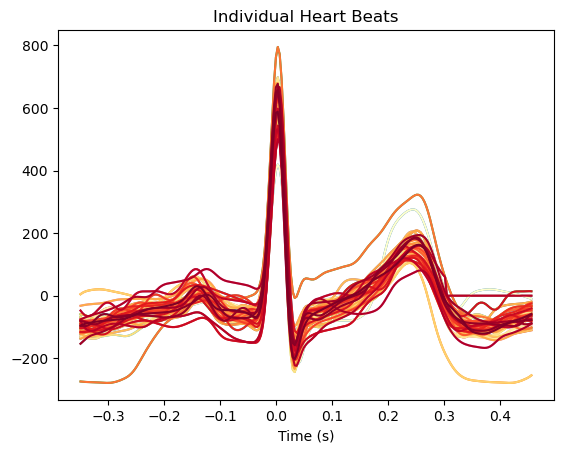

In [58]:
beats = nk.ecg_segment(clean, info['ECG_R_Peaks'], 300, show=True)

# define pre processing function

In [36]:
#write a function that does preprocessing to the raw ecg signal of one patient and returns an array of features
def pre_processing(ecg, rate):
    #first invert the raw signal if it is necessary
    ecg, _ = nk.ecg_invert(ecg_signal=ecg, sampling_rate=rate)
    # automated processing and peak detection
    sig, info = nk.ecg_process(ecg_signal=ecg, sampling_rate=rate)
    rpeaks = info['ECG_R_Peaks']
        
    return sig

In [46]:
ecg = pre_processing(data.loc[0].dropna().to_numpy(dtype='float32'),300)

# get arrays for all peaks/onsets/offsets

In [47]:
P_onsets = np.array(ecg.index[ecg['ECG_P_Onsets'] == True])
P_peaks = np.array(ecg.index[ecg['ECG_P_Peaks'] == True])
P_offsets = np.array(ecg.index[ecg['ECG_P_Offsets'] == True])
R_onsets = np.array(ecg.index[ecg['ECG_R_Onsets'] == True])
R_peaks = np.array(ecg.index[ecg['ECG_R_Peaks'] == True])
R_offsets = np.array(ecg.index[ecg['ECG_R_Offsets'] == True])
Q_peaks = np.array(ecg.index[ecg['ECG_Q_Peaks'] == True])
S_peaks = np.array(ecg.index[ecg['ECG_S_Peaks'] == True])
T_onsets = np.array(ecg.index[ecg['ECG_T_Onsets'] == True])
T_peaks = np.array(ecg.index[ecg['ECG_T_Peaks'] == True])
T_offsets = np.array(ecg.index[ecg['ECG_T_Offsets'] == True])

In [48]:
# check how many peaks/onsets/offsets were detected
ecg.sum()

ECG_Raw                             1.495800e+05
ECG_Clean                           6.562779e+03
ECG_Rate                            1.205339e+06
ECG_Quality                         1.249057e+04
ECG_R_Peaks                         6.700000e+01
ECG_P_Peaks                         6.700000e+01
ECG_P_Onsets                        6.600000e+01
ECG_P_Offsets                       6.700000e+01
ECG_Q_Peaks                         6.700000e+01
ECG_R_Onsets                        6.700000e+01
ECG_R_Offsets                       6.500000e+01
ECG_S_Peaks                         6.700000e+01
ECG_T_Peaks                         6.700000e+01
ECG_T_Onsets                        6.700000e+01
ECG_T_Offsets                       6.700000e+01
ECG_Phase_Atrial                    3.162000e+03
ECG_Phase_Completion_Atrial         8.112500e+03
ECG_Phase_Ventricular               6.696000e+03
ECG_Phase_Completion_Ventricular    8.103000e+03
dtype: float64

# plot the detected peaks to check where the detection failed

"\nplt.scatter(P_onsets[i], sig[P_onsets[i]], color='red')\nplt.scatter(P_offset[i], sig[P_offset[i]], color='red')\nplt.scatter(Q_peaks[i], sig[Q_peaks[i]], color='red')\nplt.scatter(R_onsets[i], sig[R_onsets[i]], color='red')\n#plt.scatter(R_peaks[i], sig[R_peaks[i]], color='red')\nplt.scatter(R_offsets[i], sig[R_offsets[i]], color='red')\n#plt.scatter(S_peaks[i], sig[S_peaks[i]], color='red')\nplt.scatter(T_onsets[i], sig[T_onsets[i]], color='red')\nplt.scatter(T_offsets[i], sig[T_offsets[i]], color='red')\n"

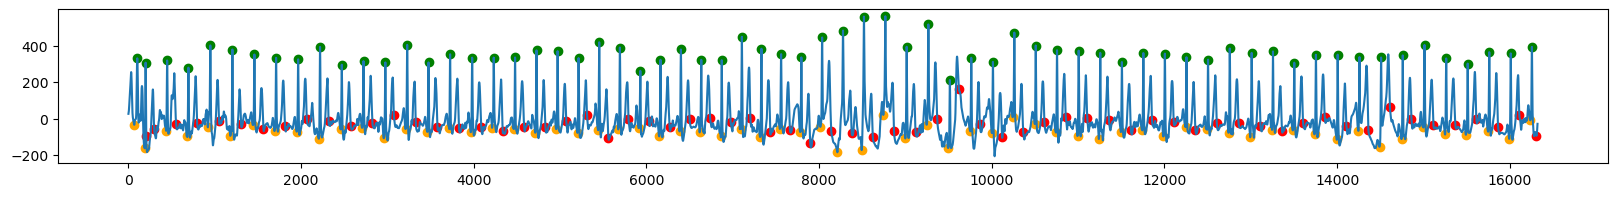

In [49]:
i=0
sig = ecg['ECG_Clean']
plt.figure(figsize=(20,2))
plt.plot(range(sig.shape[0]), sig)
for i in range(R_peaks.shape[0]):
    plt.scatter(R_peaks[i], sig[R_peaks[i]], color='green')
    if (i<T_offsets.shape[0]):
        plt.scatter(T_offsets[i], sig[T_offsets[i]], color='red')
        
    if (i<Q_peaks.shape[0]):
        plt.scatter(Q_peaks[i], sig[Q_peaks[i]], color='orange')


# check peak detection for one beat only

<Figure size 640x480 with 0 Axes>

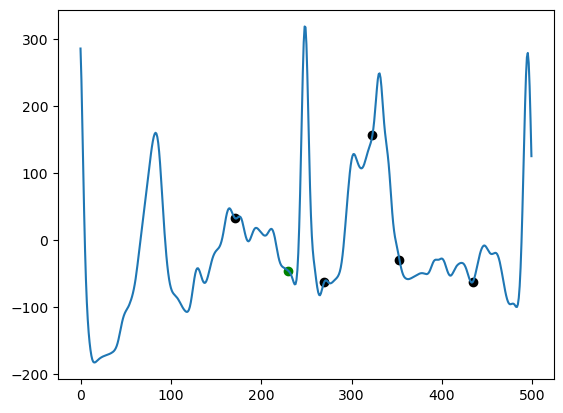

<Figure size 640x480 with 0 Axes>

In [53]:
start = 200
finish = 700
i=2
sig = ecg['ECG_Clean'][start:finish]
plt.figure()
plt.plot(range(sig.shape[0]), sig)
plt.scatter(P_onsets[i]-start, sig[P_onsets[i]], color='black')
plt.scatter(P_offsets[i]-start, sig[P_offsets[i]], color='black')
plt.scatter(R_onsets[i]-start, sig[R_onsets[i]], color='green')
#plt.scatter(Q_peaks[i]-start, sig[Q_peaks[i]], color='orange')
#plt.scatter(S_peaks[i]-start, sig[S_peaks[i]], color='orange')
plt.scatter(R_offsets[i]-start, sig[R_offsets[i]], color='black')
plt.scatter(T_onsets[i]-start, sig[T_onsets[i]], color='black')
plt.scatter(T_offsets[i]-start, sig[T_offsets[i]], color='black')

plt.figure()

In [ ]:
#choose patient
pat3 = data.loc[0].dropna().to_numpy(dtype='float32')

# begin to build a pre-processing pipeline

In [ ]:
#first invert the raw signal if it is necessary
ecg, _ = nk.ecg_invert(ecg_signal=ecg, sampling_rate=rate)
# automated processing and peak detection
signal, info = nk.ecg_process(ecg_signal=ecg, sampling_rate=rate, )
rpeaks = info['ECG_R_Peaks']

#get the index of all detected peaks
P_onsets = np.array(ecg.index[ecg['ECG_P_Onsets'] == True])
P_offset = np.array(ecg.index[ecg['ECG_P_Offsets'] == True])
R_onsets = np.array(ecg.index[ecg['ECG_R_Onsets'] == True])
R_offsets = np.array(ecg.index[ecg['ECG_R_Offsets'] == True])
T_onsets = np.array(ecg.index[ecg['ECG_T_Onsets'] == True])
T_offsets = np.array(ecg.index[ecg['ECG_T_Offsets'] == True])

#initialize intervals
PR_int = []
PR_seg = []
QRS_comp = []
QT_int = []
ST_seg = []

#iterate threw all heart beats to extract the intervals
for i in range(rpeaks.shape[0]):
    #check if all peaks were detected 
    # if not -> discard this beat? or do we lose information?
    PR.append(P_onset)
        
    